# Default of Credit Card Clients

There are 25 variables:
    
    ID: ID of each client

    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    
    SEX: Gender (1=male, 2=female)

    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    
    AGE: Age in years
    
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

    default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
FILEPATH = "E:\Project Based Datasets\Credit Card Clients\Default of Credit card payments\default of credit card clients.xls"

In [3]:
Credit_card = pd.read_excel(r"E:\Project Based Datasets\Credit Card Clients\Default of Credit card payments\default of credit card clients.xls", header=1)

In [4]:
Credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credit_c = Credit_card.copy()

In [6]:
credit_c.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
credit_c.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
nRows, nCols = credit_c.shape

In [9]:
print(f'There are {nRows} rows and {nCols} columns in the dataset.')

There are 30000 rows and 25 columns in the dataset.


In [10]:
credit_c.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Column name standardization

credit_c.rename(columns= {'default payment next month': 'default_pay', 'LIMIT_BAL':'Limited_bal'}, inplace=True)

In [12]:
# 2nd method

credit_c.columns = map(str.capitalize,credit_c.columns)

In [13]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_0',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay'],
      dtype='object')

***The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including index dtype and column dtypes, non-null values and memory usage.***

In [14]:
credit_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id           30000 non-null  int64
 1   Limited_bal  30000 non-null  int64
 2   Sex          30000 non-null  int64
 3   Education    30000 non-null  int64
 4   Marriage     30000 non-null  int64
 5   Age          30000 non-null  int64
 6   Pay_0        30000 non-null  int64
 7   Pay_2        30000 non-null  int64
 8   Pay_3        30000 non-null  int64
 9   Pay_4        30000 non-null  int64
 10  Pay_5        30000 non-null  int64
 11  Pay_6        30000 non-null  int64
 12  Bill_amt1    30000 non-null  int64
 13  Bill_amt2    30000 non-null  int64
 14  Bill_amt3    30000 non-null  int64
 15  Bill_amt4    30000 non-null  int64
 16  Bill_amt5    30000 non-null  int64
 17  Bill_amt6    30000 non-null  int64
 18  Pay_amt1     30000 non-null  int64
 19  Pay_amt2     30000 non-null  int64
 20  Pay_am

In [15]:
credit_c.memory_usage()

Index             128
Id             240000
Limited_bal    240000
Sex            240000
Education      240000
Marriage       240000
Age            240000
Pay_0          240000
Pay_2          240000
Pay_3          240000
Pay_4          240000
Pay_5          240000
Pay_6          240000
Bill_amt1      240000
Bill_amt2      240000
Bill_amt3      240000
Bill_amt4      240000
Bill_amt5      240000
Bill_amt6      240000
Pay_amt1       240000
Pay_amt2       240000
Pay_amt3       240000
Pay_amt4       240000
Pay_amt5       240000
Pay_amt6       240000
Default_pay    240000
dtype: int64

***The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a datasets distribution, excluding NaN values***

In [16]:
credit_c.describe()

,Id,Limited_bal,Sex,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


    When we see the age column the credit card approval age minimum is 21 years and the most of the persons who have credit card is aged more than 35 years

In [17]:
# Lets check how many persons above 35 years are using credit card

credit_c[credit_c['Age'] >= 35]['Age'].count() # Nearly half of the persons are >=  35 aged persons.

14304

## Categorical Variables Description¶

In [18]:
# The categorical values are 'Sex', 'Education' and 'Marriage'

credit_c[['Sex', 'Education', 'Marriage']].describe()

,Sex,Education,Marriage
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


    No missing data, but a few anamalous things

    Education has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
    Marriage has  a label 0 that is undocumented.

## Payment delay description

In [19]:
# Payments column is 'Pay_0', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6',

credit_c[['Pay_0','Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']].describe()

,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


    We see the description shows as 'Pay_0', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6'.

    When we check the dataset , Pay_6 is April 2005, pay_5 is May 2005 ...... Pay_2 is August 2005, so Pay_0 needs to be converted to Pay_1 which is Sepetember which is mentioned in Description.

In [20]:
# Renaming 'Pay_0' to 'Pay_1'

credit_c.rename(columns = {'Pay_0': 'Pay_1'}, inplace = True)

In [21]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay'],
      dtype='object')

## Bill amount Statement Description

In [22]:
# Bill_amt description are 'Bill_amt1', 'Bill_amt2','Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6'

credit_c[['Bill_amt1', 'Bill_amt2','Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']].describe()

,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


## Previous Payment Description

In [23]:
# Previous payment description cols are 'Pay_amt1','Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6'

credit_c[['Pay_amt1','Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6']].describe()

,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## Limited_bal description

In [24]:
credit_c[['Limited_bal']].describe()

,Limited_bal
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


    As per the above descriptive statistics in limit_bal we see the average credit card limit is 167484.32 per person

    The minimum credit limit is 10000 and maximum credit limit is 10 lakhs 1000000

## Default Payment Description

In [25]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay'],
      dtype='object')

In [26]:
credit_c[['Default_pay']].describe()

,Default_pay
count,30000.000000
mean,0.221200
std,0.415062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


    By above output we see the mean shows as 0.22 which means 22% of people are not making the payment regularly and
    they have delay of 1 or 2 months so, their credit card might go on default payment next month

In [27]:
# Interested in having a general idea of the default probability

credit_c.Default_pay.sum() / len(credit_c.Default_pay)

0.2212

## Duplicate Values

In [28]:
credit_c.duplicated().sum()    # There are no duplicated values 

0

## Null values

In [29]:
credit_c.isnull().sum()       # there are no null values as well

Id             0
Limited_bal    0
Sex            0
Education      0
Marriage       0
Age            0
Pay_1          0
Pay_2          0
Pay_3          0
Pay_4          0
Pay_5          0
Pay_6          0
Bill_amt1      0
Bill_amt2      0
Bill_amt3      0
Bill_amt4      0
Bill_amt5      0
Bill_amt6      0
Pay_amt1       0
Pay_amt2       0
Pay_amt3       0
Pay_amt4       0
Pay_amt5       0
Pay_amt6       0
Default_pay    0
dtype: int64

## Visualization for default_payment_next month

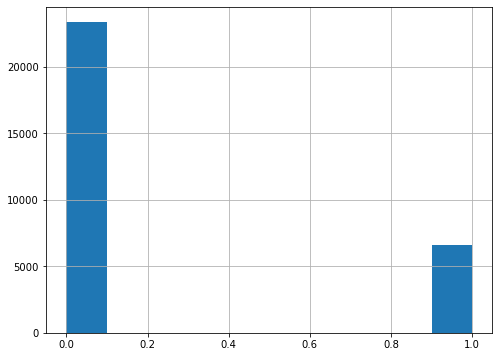

In [30]:
plt.figure(figsize= (8,6))
credit_c.Default_pay.hist()
plt.show()

<Figure size 576x432 with 0 Axes>

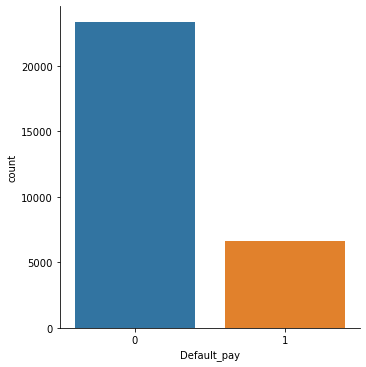

In [31]:
plt.figure(figsize= (8,6))
sns.catplot(x = 'Default_pay', kind = 'count', data = credit_c)
plt.show()

***By above output 0 means who are regularly making the payment and 1 is who has delayed the payment. Almost 6000 persons are delaying the payment and their credit card can go to Default_Payment for next month***

In [32]:
# Checking which age group persons are making the payment regularly.

credit_c[credit_c['Default_pay'] == 0].count()

Id             23364
Limited_bal    23364
Sex            23364
Education      23364
Marriage       23364
Age            23364
Pay_1          23364
Pay_2          23364
Pay_3          23364
Pay_4          23364
Pay_5          23364
Pay_6          23364
Bill_amt1      23364
Bill_amt2      23364
Bill_amt3      23364
Bill_amt4      23364
Bill_amt5      23364
Bill_amt6      23364
Pay_amt1       23364
Pay_amt2       23364
Pay_amt3       23364
Pay_amt4       23364
Pay_amt5       23364
Pay_amt6       23364
Default_pay    23364
dtype: int64

In [33]:
credit_c[credit_c['Default_pay'] == 0]['Default_pay'].count()

23364

In [34]:
credit_c.Default_pay.value_counts()   # 1 are not making the payment regularly 

0    23364
1     6636
Name: Default_pay, dtype: int64

In [35]:
# persons who are making payments regularly who age is >= 35

len(credit_c[(credit_c['Default_pay'] == 0) & (credit_c['Age'] >=35)])

11039

In [36]:
# persons who are making payments regularly who age is <= 35

len(credit_c[(credit_c['Default_pay'] ==0) & (credit_c['Age'] <35)])

12325

### Creating categories for Age columns

In [37]:
pd.qcut(credit_c.Age,3)   # The Age column is categorised to 3 categories (20.99 - 30.0) (30.0, 39.0]  (39.0, 79.0]

0        (20.999, 30.0]
1        (20.999, 30.0]
2          (30.0, 39.0]
3          (30.0, 39.0]
4          (39.0, 79.0]
              ...      
29995      (30.0, 39.0]
29996      (39.0, 79.0]
29997      (30.0, 39.0]
29998      (39.0, 79.0]
29999      (39.0, 79.0]
Name: Age, Length: 30000, dtype: category
Categories (3, interval[float64]): [(20.999, 30.0] < (30.0, 39.0] < (39.0, 79.0]]

In [38]:
# Here I am labeling the group to 'Young', 'middle' and 'Senior' age persons

Age_binned = pd.qcut(credit_c.Age,3, labels = ['Young','Middle','Senior'])  

In [39]:
# creating a new column as 'Age_binned'

credit_c['Age_binned'] = Age_binned

***Checking which age group people are regularly making the payment***

In [40]:
credit_c.groupby('Default_pay')['Age_binned'].value_counts()

Default_pay  Age_binned
0            Young         8542
             Middle        7841
             Senior        6981
1            Young         2471
             Senior        2163
             Middle        2002
Name: Age_binned, dtype: int64

 ***As per the above output we see 0 mean regularly making the payments, 1 mean delay in 1/2/3/... in mmaking the credit card payment***
 
 ***We see maximum (8542) Young age people (20 - 30 age)are making the payments regularly***
 
 ***Also we see young age people (2471) are also not making the payment regularly.***

## Lets check if the young age people who are not making the payments regularly are 'Educated' / 'Married' / 'Limited_bal'

In [41]:
#age people who are not making payment regularly

credit_c[credit_c['Default_pay'] == 1] 

,Id,Limited_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay,Age_binned
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,Young
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,Young
13,14,70000,1,2,2,30,1,2,2,0,...,36137,36894,3200,0,3000,3000,1500,0,1,Young
16,17,20000,1,1,2,24,0,0,2,2,...,17905,19104,3200,0,1500,0,1650,0,1,Young
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,632,316,316,316,0,632,316,0,1,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,0,0,0,0,0,0,1,Middle
29994,29995,80000,1,2,2,34,2,2,2,2,...,82607,81158,7000,3500,0,7000,0,4000,1,Middle
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,Middle
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,Senior


In [42]:
len(credit_c[credit_c['Default_pay'] == 1])

6636

    Almost 6636 people are not making the payments regularly

In [43]:
# Checking persons who have limited bal of 10000 and  who are not making payments regularly

credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] >= 10000)]

,Id,Limited_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay,Age_binned
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,Young
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,Young
13,14,70000,1,2,2,30,1,2,2,0,...,36137,36894,3200,0,3000,3000,1500,0,1,Young
16,17,20000,1,1,2,24,0,0,2,2,...,17905,19104,3200,0,1500,0,1650,0,1,Young
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,632,316,316,316,0,632,316,0,1,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,0,0,0,0,0,0,1,Middle
29994,29995,80000,1,2,2,34,2,2,2,2,...,82607,81158,7000,3500,0,7000,0,4000,1,Middle
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,Middle
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,Senior


In [44]:
credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000)]

,Id,Limited_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay,Age_binned
66,67,10000,1,2,1,56,2,2,2,0,...,4196,4326,2300,0,150,200,200,160,1,Senior
293,294,10000,1,2,2,27,0,0,2,0,...,9963,10182,3507,0,500,370,393,700,1,Young
532,533,10000,1,2,2,46,0,0,2,2,...,6652,6785,2400,0,871,0,244,251,1,Senior
702,703,10000,2,3,2,22,0,0,0,0,...,0,0,2000,1036,0,0,0,0,1,Young
721,722,10000,1,2,2,22,0,0,0,0,...,9293,5033,2000,1000,500,1500,0,2500,1,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29771,29772,10000,1,2,1,37,-1,4,3,2,...,7463,7199,0,0,0,1000,0,3000,1,Middle
29785,29786,10000,1,2,2,47,2,0,0,0,...,9422,9619,1145,1136,1144,329,340,418,1,Senior
29843,29844,10000,1,3,1,42,2,2,0,0,...,8898,7667,0,1200,1500,0,1000,3000,1,Senior
29845,29846,10000,1,2,1,37,1,-2,-1,3,...,4779,7680,0,5500,0,0,3000,2000,1,Middle


In [45]:
len(credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000)])

197

***We see the persons (6636) who are not making payments regularly who have the limit_bal more > = 10000***

***We see the persons (197) who are not making payments regularly who have the limit_bal  < = 10000***

In [46]:
# Lets check the Education of persons who have limited bal and not making payment regularly

credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000) & (credit_c['Education'] == 1)]

,Id,Limited_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay,Age_binned
1945,1946,10000,2,1,2,27,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,1,Young
3178,3179,10000,1,1,2,24,2,0,0,0,...,10096,9415,1500,2000,700,1500,0,1000,1,Young
3573,3574,10000,1,1,2,24,0,0,2,0,...,9515,9700,2616,0,400,499,500,900,1,Young
6084,6085,10000,1,1,2,23,2,2,3,3,...,1050,1050,0,0,0,0,0,0,1,Young
6271,6272,10000,2,1,2,23,2,2,7,7,...,2400,1800,0,0,0,0,0,0,1,Young
6315,6316,10000,1,1,2,24,0,0,2,0,...,12856,8078,2500,0,227,239,3412,0,1,Young
6683,6684,10000,1,1,1,38,-1,-1,2,0,...,10470,10169,5000,0,500,1100,0,1000,1,Middle
6874,6875,10000,1,1,2,22,0,0,-1,-1,...,390,0,0,390,390,390,0,780,1,Young
6916,6917,10000,1,1,2,22,2,2,2,0,...,10017,9705,2500,0,1400,1100,0,500,1,Young
10155,10156,10000,2,1,2,22,0,0,0,2,...,9442,9144,1300,1602,0,948,0,484,1,Young


In [47]:
len(credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000) & (credit_c['Education'] == 1)])

# 1 mean Graduate school have minimum bal of 10000 and not making the payment regularly 

24

In [48]:
len(credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000) & (credit_c['Education'] == 2)])

# 2 mean University have minimum bal of 10000 and not making the payment regularly 

119

In [49]:
len(credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000) & (credit_c['Education'] == 3)])

# 3 mean high school have minimum bal of 10000 and not making the payment regularly 

53

In [50]:
len(credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000) & (credit_c['Education'] == 4)])

# 4,5,6 mean education is unknown have minimum bal of 10000 and not making the payment regularly 

0

In [51]:
len(credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000) & (credit_c['Education'] == 5)])

# 4,5,6 mean education is unknown have minimum bal of 10000 and not making the payment regularly 

1

In [52]:
len(credit_c[(credit_c['Default_pay'] == 1) & (credit_c['Limited_bal'] <= 10000) & (credit_c['Education'] == 6)])

# 4,5,6 mean education is unknown have minimum bal of 10000 and not making the payment regularly 

0

***By the above output we can confirm that persons who have education "University and High School" are not making payments regularly and their limited balance is 10000***

## Lets do EDA based on Payment delay

In [53]:
# Lets check the persons who have payment delay more than 3 months

credit_c['Pay_1'].value_counts()   # For month of Sepetember 

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Pay_1, dtype: int64

    As per above output we confirm that (322+76+26+19+11+9) total of 463 persons have delayed their payments more than 
    3 months.

In [54]:
credit_c['Pay_2'].value_counts() # For the month of August 

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Pay_2, dtype: int64

In [55]:
credit_c['Pay_3'].value_counts() # For the month of July

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Pay_3, dtype: int64

In [56]:
credit_c['Pay_3'].value_counts() # For the month of June

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Pay_3, dtype: int64

In [57]:
credit_c['Pay_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: Pay_4, dtype: int64

In [58]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay', 'Age_binned'],
      dtype='object')

In [59]:
pay_scale = credit_c[['Pay_1','Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']]

In [60]:
for i in pay_scale:
    print(credit_c[i].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Pay_1, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Pay_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Pay_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: Pay_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: Pay_5, dtype: int64
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: Pay_6, dtype: int64


***Sepetember month payment delay***

In [61]:
# Let's view the persons who have limited bal payment delayed for more than 3 mmonths 

credit_c[(credit_c['Pay_1'] >= 3) & (credit_c['Limited_bal'] <= 10000)] # Sepetember month

,Id,Limited_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay,Age_binned
4572,4573,10000,2,2,1,55,3,2,2,2,...,6780,7676,1200,0,1000,0,1000,0,1,Senior
8221,8222,10000,1,2,1,43,3,2,2,4,...,10396,10085,1500,2000,0,0,0,350,1,Senior
9503,9504,10000,1,5,2,35,3,2,0,0,...,0,0,25,4000,0,1000,0,0,0,Middle
10815,10816,10000,1,2,1,24,5,4,3,2,...,9137,9177,0,0,0,480,340,500,1,Young
12524,12525,10000,1,2,2,23,3,2,2,0,...,5275,0,1081,0,353,375,0,0,0,Young
13783,13784,10000,2,2,2,22,5,4,3,2,...,8224,7944,0,0,0,778,0,158,1,Young
14630,14631,10000,1,2,2,23,3,2,2,2,...,9933,9884,0,1600,500,0,1000,0,1,Young
15885,15886,10000,2,2,1,31,3,2,0,0,...,8449,8493,0,1281,1135,448,329,287,0,Middle
16228,16229,10000,2,2,1,37,3,2,0,0,...,9549,9774,0,1122,1730,0,508,425,1,Middle
16542,16543,10000,1,2,1,27,4,3,3,2,...,4500,4282,900,0,1000,0,0,433,1,Young


In [62]:
len(credit_c[(credit_c['Pay_1'] >= 3) & (credit_c['Limited_bal'] <= 10000)])

26

In [63]:
# persons who have delayed the payment for more than 3 months with > 10000 limited bal

len(credit_c[(credit_c['Pay_1'] >= 3) & (credit_c['Limited_bal'] > 10000)])

437

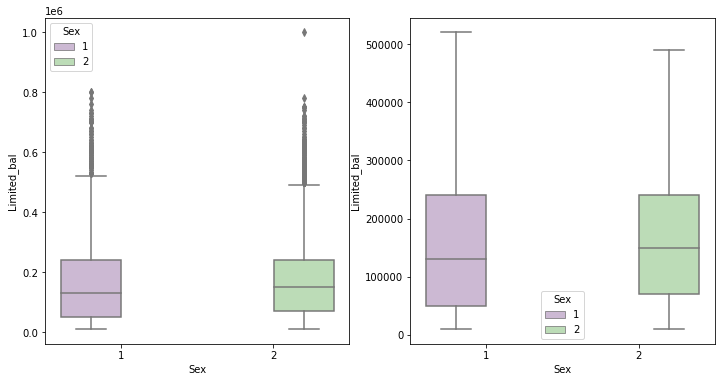

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Sex", y="Limited_bal", hue="Sex",data=credit_c, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Sex", y="Limited_bal", hue="Sex",data=credit_c, palette="PRGn",showfliers=False)
plt.show();

***The credit limit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).***

## Let's explore data with some questions

In [65]:
credit_c.groupby('Sex').size()    # 1 is female, 2 is male

Sex
1    11888
2    18112
dtype: int64

In [66]:
credit_c.groupby('Marriage').size()   

Marriage
0       54
1    13659
2    15964
3      323
dtype: int64

***Function to view all categorical columns***

In [67]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    s = sns.boxplot(x=feature1, y=feature2, hue=feature3,data=credit_c, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

    Marriage Status :
    
    Marital status (1=married, 2=single, 3=others)

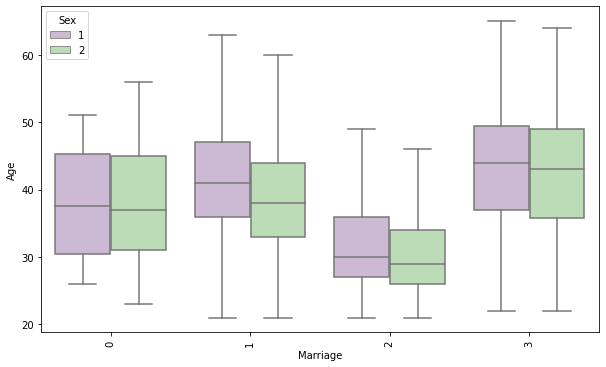

In [68]:
plt.figure(figsize= (10,6))
boxplot_variation('Marriage','Age','Sex', 8)

    Education status meaning is:

    1 : graduate school
    2 : university
    3 : high school
    4 : others
    5 : unknown
    6 : unknown

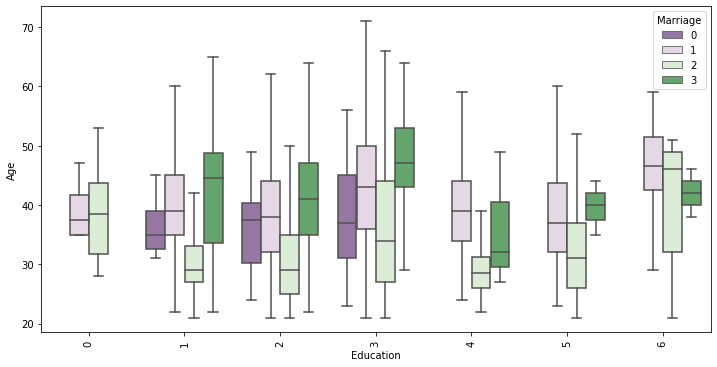

In [69]:
plt.figure(figsize= (12,6))
boxplot_variation('Education','Age','Marriage',12)

***Marriage status, education level and credit amount limit***

***Let's view the boxplots with credit amount limit distribution grouped by marriage status and education level.***

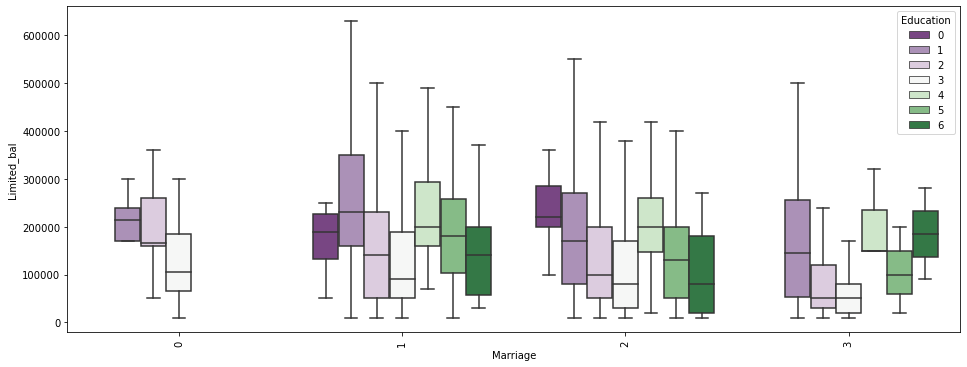

In [70]:
plt.figure(figsize= (16,6))
boxplot_variation('Marriage', 'Limited_bal','Education', 12)

# Lets view how the features are skewed

In [71]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay', 'Age_binned'],
      dtype='object')

In [72]:
credit_c.skew().sort_values(ascending=True)

Sex            -0.424183
Marriage       -0.018742
Id              0.000000
Pay_1           0.731975
Age             0.732246
Pay_2           0.790565
Pay_3           0.840682
Pay_6           0.948029
Education       0.970972
Limited_bal     0.992867
Pay_4           0.999629
Pay_5           1.008197
Default_pay     1.343504
Bill_amt1       2.663861
Bill_amt2       2.705221
Bill_amt4       2.821965
Bill_amt6       2.846645
Bill_amt5       2.876380
Bill_amt3       3.087830
Pay_amt6       10.640727
Pay_amt5       11.127417
Pay_amt4       12.904985
Pay_amt1       14.668364
Pay_amt3       17.216635
Pay_amt2       30.453817
dtype: float64

    We see all the columns are positively skewed exluding Sex and Marriage 

In [73]:
credit_c['Pay_amt6'].mean()  # For month of April

5215.502566666667

In [74]:
credit_c['Pay_amt6'].max()

528666

In [75]:
credit_c['Pay_amt3'].mean()  # For month of July

5225.6815

In [76]:
credit_c['Pay_amt3'].max()

896040

In [77]:
credit_c['Pay_amt2'].mean() # For month of August

5921.1635

In [78]:
credit_c['Pay_amt2'].max()  

1684259

In [79]:
credit_c['Pay_amt1'].mean() # For mont of Sepetember

5663.5805

In [80]:
credit_c['Pay_amt1'].max() 

873552

# Correlation plot

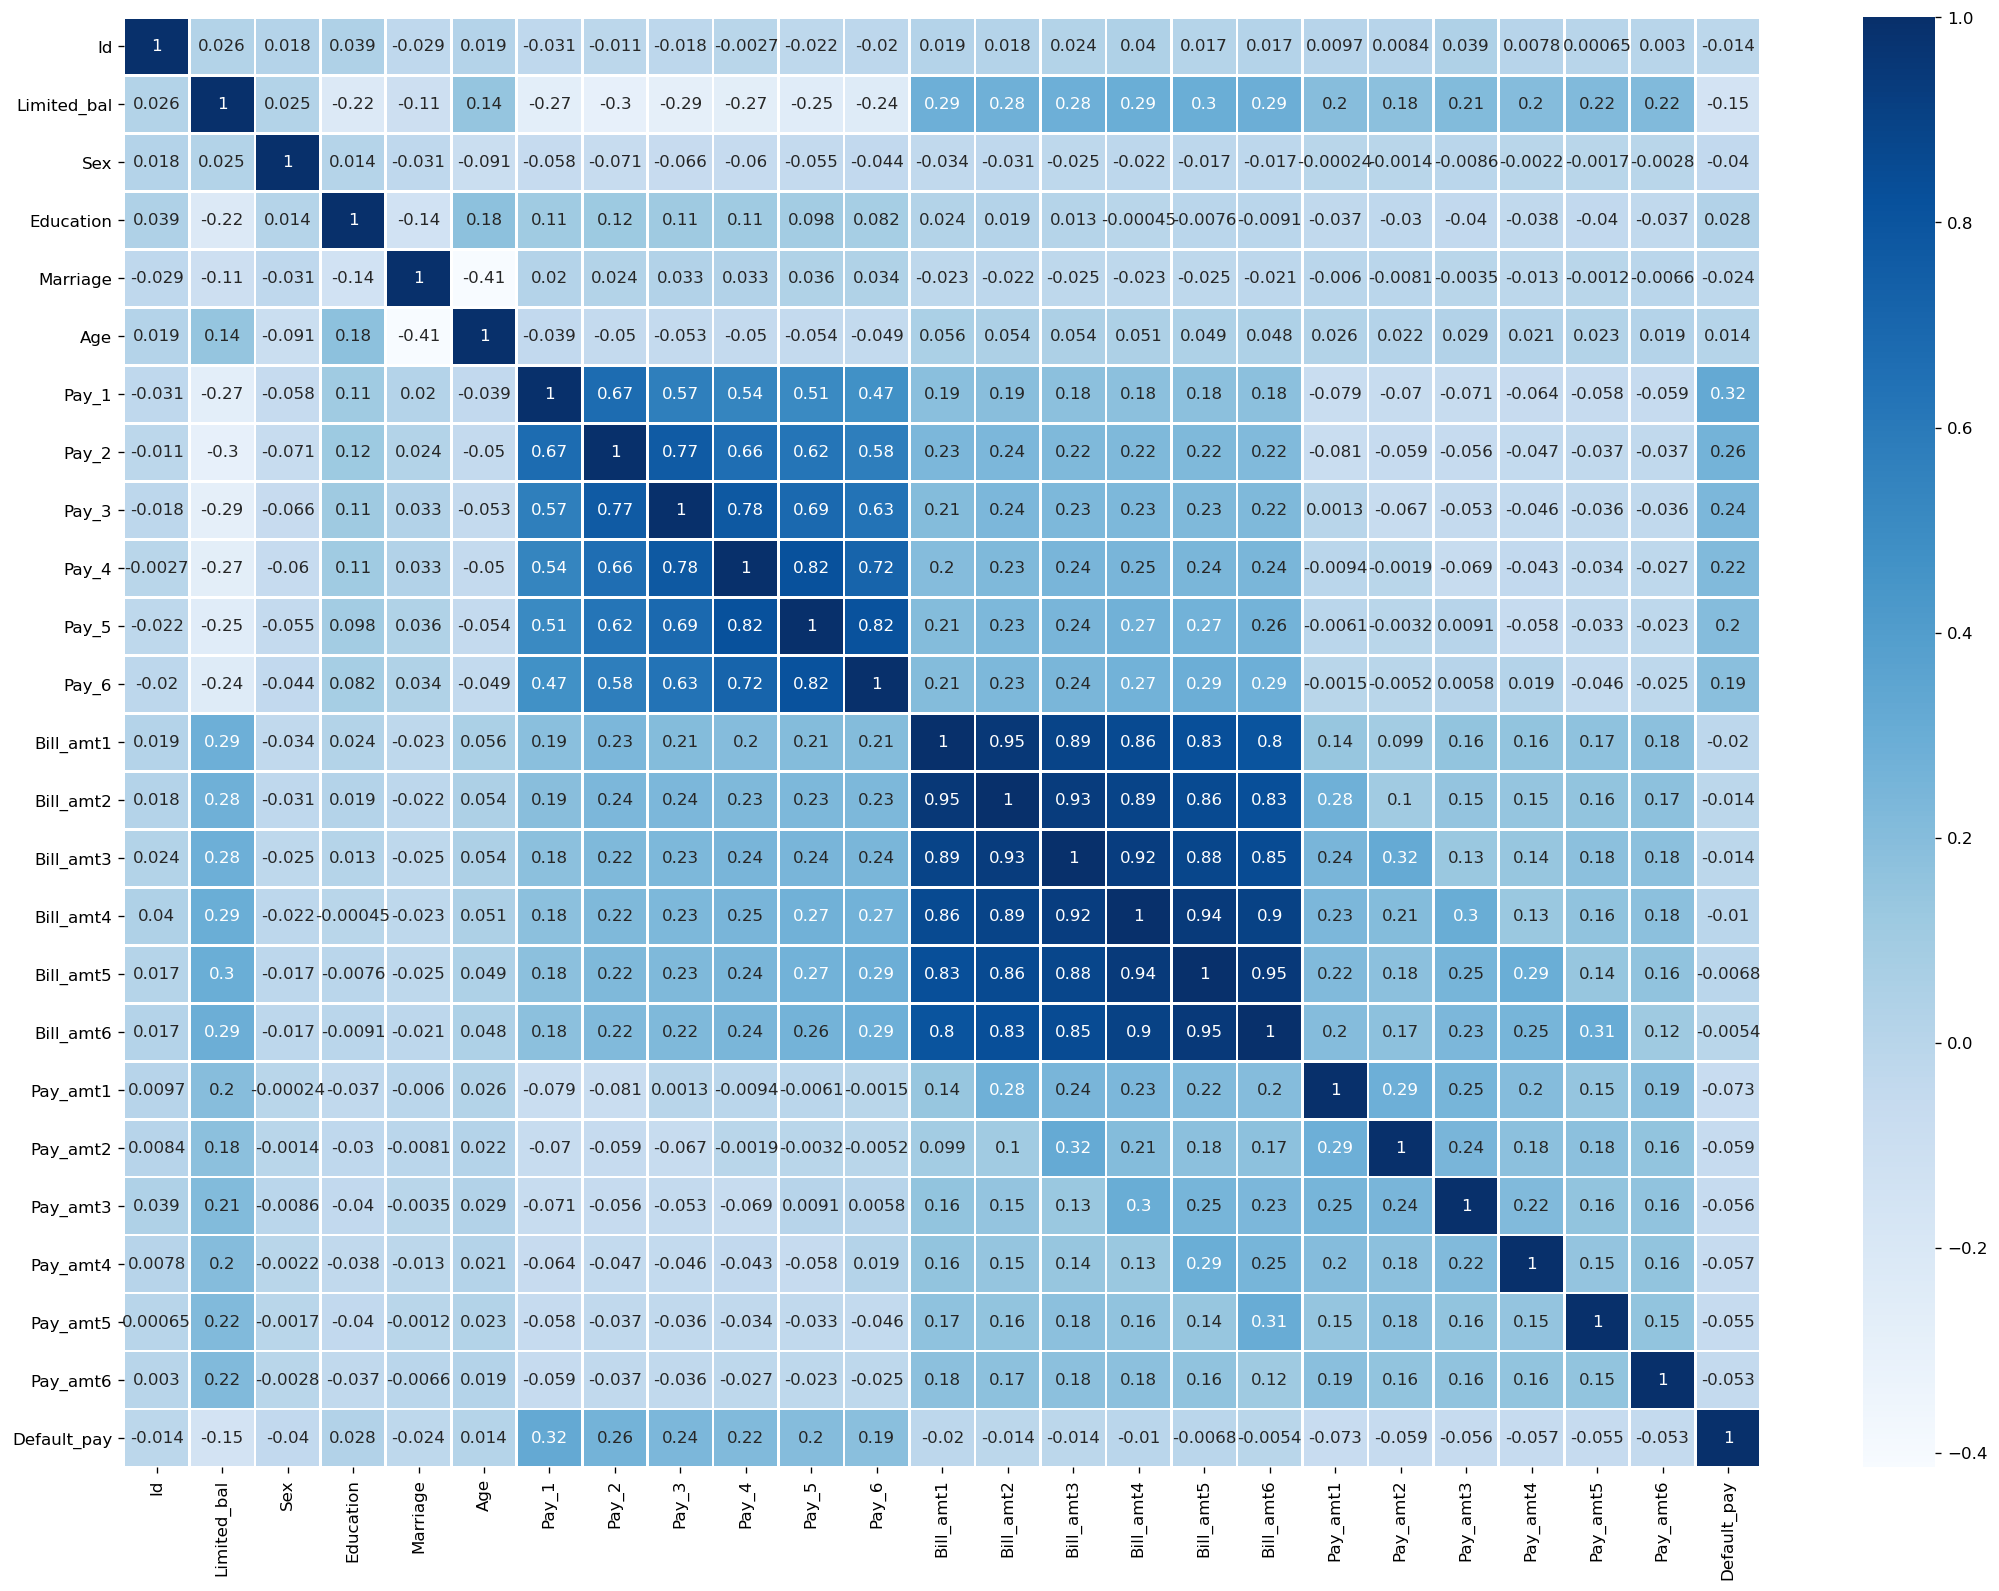

In [81]:
plt.figure(figsize = (22,16), dpi=120)
sns.heatmap(credit_c.corr(), cmap= 'Blues', annot=True, linewidths=1)
plt.show()

### Plotting variables seperately

In [82]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay', 'Age_binned'],
      dtype='object')

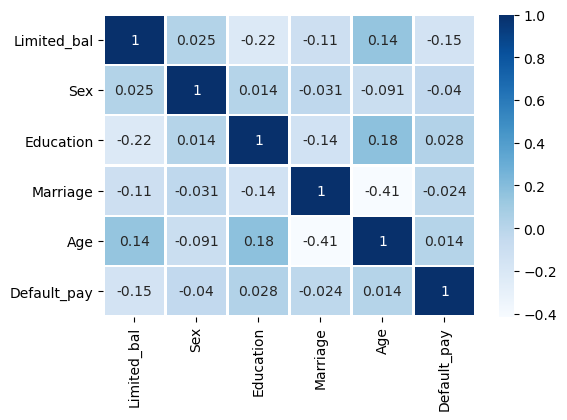

In [83]:
plt.figure(figsize= (6,4), dpi=100)
sns.heatmap(credit_c[['Limited_bal', 'Sex', 'Education',
                      'Marriage', 'Age', 'Default_pay']].corr(), annot=True,cmap= 'Blues', linewidths=1)
plt.show()

***By above plot we confirm that Limited Balance is negatively co-related with target variable***

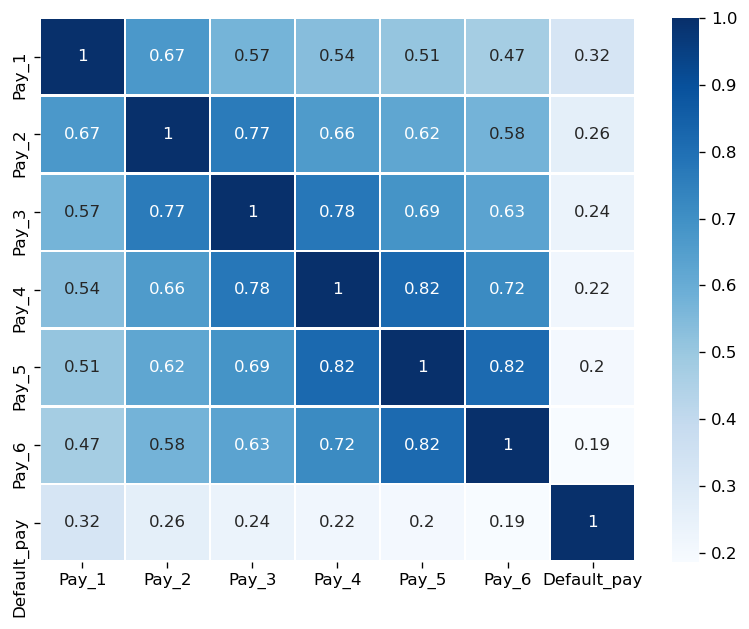

In [84]:
# Plotting the variables seperately pay_scale

plt.figure(figsize = (8,6), dpi= 120)
sns.heatmap(credit_c[['Pay_1','Pay_2', 'Pay_3',
                      'Pay_4', 'Pay_5', 'Pay_6','Default_pay']].corr(), annot=True,cmap= 'Blues', linewidths=1)
plt.show()

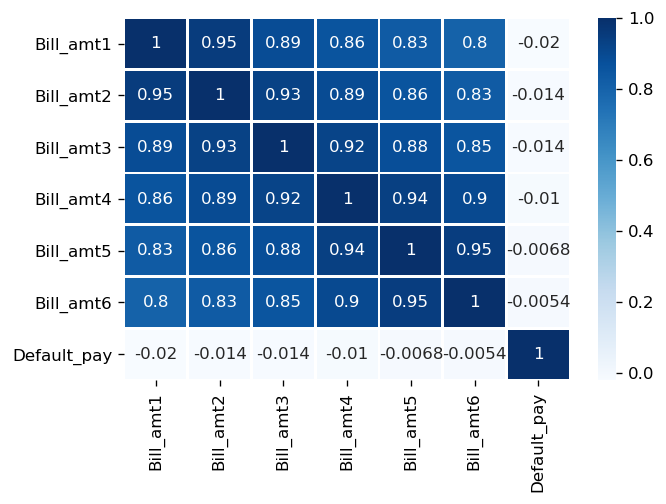

In [85]:
# Plotting the variables seperately

plt.figure(figsize = (6,4), dpi= 120)
sns.heatmap(credit_c[['Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6','Default_pay']].corr(), annot=True,cmap= 'Blues', linewidths=1)
plt.show()

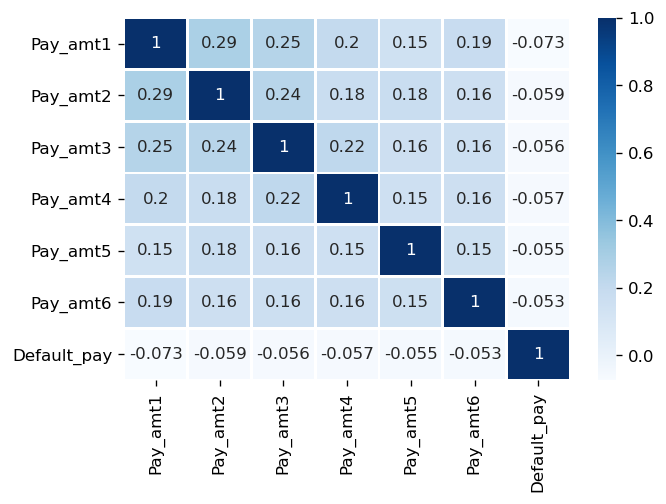

In [86]:
# Plotting the variables seperately

plt.figure(figsize = (6,4), dpi= 120)
sns.heatmap(credit_c[['Pay_amt1','Pay_amt2', 'Pay_amt3',
                      'Pay_amt4', 'Pay_amt5', 'Pay_amt6','Default_pay']].corr(), annot=True,cmap= 'Blues', linewidths=1)
plt.show()

In [87]:
# Categories in 'Education' column

credit_c['Education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In [88]:
# Changing the variables in Education and moving 0 , 5 and 6 which shows as unknown, now moving all these 3 values to 4(unknown)

credit_c['Education'] = np.where(credit_c['Education'] < 1, 4, credit_c['Education'])
credit_c['Education'] = np.where(credit_c['Education'] > 4, 4, credit_c['Education'])

In [89]:
credit_c['Education'].value_counts()  

2    14030
1    10585
3     4917
4      468
Name: Education, dtype: int64

    All the values in 'Education' column which were unknown (0, 4, 5, 6) , here 4 is unknown hence moved those values to 4 (unknown)

In [90]:
# Categories in 'Marriage' column

credit_c['Marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marriage, dtype: int64

In [91]:
# Since MARRIAGE: Marital status (1=married, 2=single, 3=others) , there is 0 as well which is unknown .
# Hence, lets move these 0 values to 3 which is others

credit_c['Marriage'] = np.where(credit_c['Marriage'] == 0, 3, credit_c['Marriage'])

In [92]:
# Now checking if the 0 values (54 rows are moved to 3 (others))

credit_c['Marriage'].value_counts()

2    15964
1    13659
3      377
Name: Marriage, dtype: int64

# Exploratory Data Analysis visually

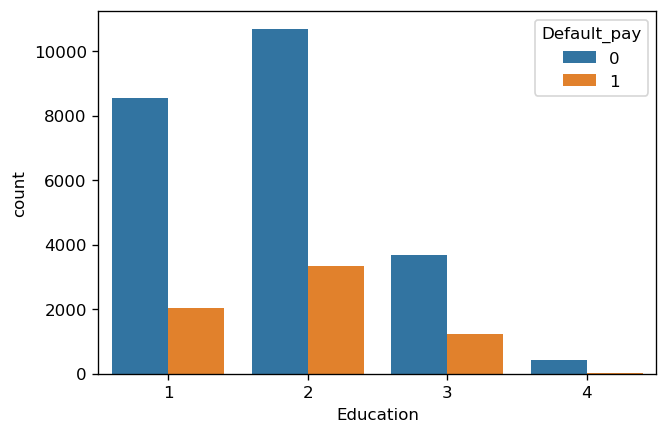

In [93]:
# Checking the persons who are not making payments regularly

plt.figure(figsize= (6,4), dpi=120)
sns.countplot(x = 'Education', hue = 'Default_pay', data= credit_c)
plt.show()

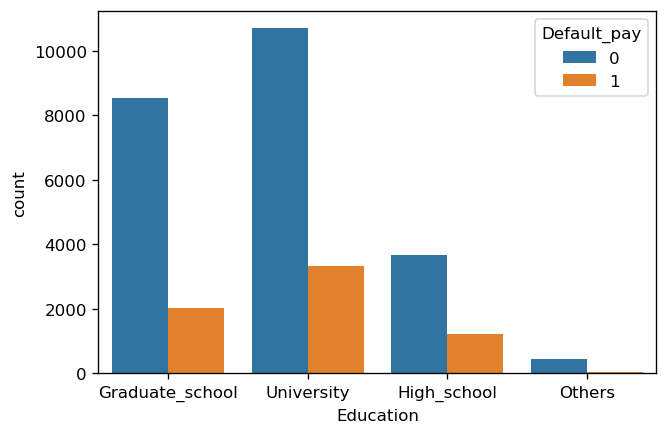

In [94]:
plt.figure(figsize= (6,4), dpi=120)
E = sns.countplot(x = 'Education', hue = 'Default_pay', data= credit_c)
E.set_xticklabels(['Graduate_school', 'University', 'High_school','Others'])
plt.show();

### 0 mean "On time payments done"       1 mean "Not making the payments ontime"

     As per the above output, university people and Graduate school persons are not making the "on time payment" regularly

## Checking persons who have education but still not making the payments ontime

In [95]:
# Checking persons who have education but still not making the payments ontime

credit_c.groupby(['Education', 'Default_pay']).size()

Education  Default_pay
1          0               8549
           1               2036
2          0              10700
           1               3330
3          0               3680
           1               1237
4          0                435
           1                 33
dtype: int64

In [96]:
# Other method

credit_c.groupby(credit_c['Education'][credit_c['Default_pay']==0]).size()

Education
1.0     8549
2.0    10700
3.0     3680
4.0      435
dtype: int64

In [97]:
# same above method with modification  (adding labels) On Time payments done

default_0 = credit_c.groupby(credit_c['Education'][credit_c['Default_pay']==0]).size().reset_index(name = 'Not_Default')

default_0

,Education,Not_Default
0,1.0,8549
1,2.0,10700
2,3.0,3680
3,4.0,435


## Checking persons who have education but still not making the payments ontime

In [98]:
credit_c.groupby(['Education', 'Default_pay']).size()

Education  Default_pay
1          0               8549
           1               2036
2          0              10700
           1               3330
3          0               3680
           1               1237
4          0                435
           1                 33
dtype: int64

In [99]:
# Other method

credit_c.groupby(credit_c['Education'][credit_c['Default_pay']==1]).size()

Education
1.0    2036
2.0    3330
3.0    1237
4.0      33
dtype: int64

In [100]:
# same above method with modification  (adding labels) Not making payments on time

default_1 = credit_c.groupby(credit_c['Education'][credit_c['Default_pay']==1]).size().reset_index(name = 'Default')

default_1

,Education,Default
0,1.0,2036
1,2.0,3330
2,3.0,1237
3,4.0,33


In [101]:
# Total count in Education

total_count = credit_c.groupby(['Education']).size().reset_index(name = 'Total')

total_count

,Education,Total
0,1,10585
1,2,14030
2,3,4917
3,4,468


### Joining the two default_0 and default_1

In [102]:
# Joining two default_0 and default_1

education_table = default_0.join(default_1['Default']).join(total_count['Total'])

education_table

,Education,Not_Default,Default,Total
0,1.0,8549,2036,10585
1,2.0,10700,3330,14030
2,3.0,3680,1237,4917
3,4.0,435,33,468


In [103]:
# Getting the percentage for the above table for Not_Default

# round(,2) mean getting only 2 values after .

education_table['Not_Default'] = round((default_0['Not_Default'] / total_count['Total']) * 100,2)

In [104]:
education_table

,Education,Not_Default,Default,Total
0,1.0,80.77,2036,10585
1,2.0,76.27,3330,14030
2,3.0,74.84,1237,4917
3,4.0,92.95,33,468


In [105]:
# Getting the percentage for the above table for Default

education_table['Default'] = round((default_1['Default'] / total_count['Total']) * 100,2)

education_table

,Education,Not_Default,Default,Total
0,1.0,80.77,19.23,10585
1,2.0,76.27,23.73,14030
2,3.0,74.84,25.16,4917
3,4.0,92.95,7.05,468


In [106]:
print(education_table.to_markdown())

|    |   Education |   Not_Default |   Default |   Total |
|---:|------------:|--------------:|----------:|--------:|
|  0 |           1 |         80.77 |     19.23 |   10585 |
|  1 |           2 |         76.27 |     23.73 |   14030 |
|  2 |           3 |         74.84 |     25.16 |    4917 |
|  3 |           4 |         92.95 |      7.05 |     468 |


# Now just showing the Education, Not_Default and Default

In [107]:
education_table = education_table.iloc[:,0:3]

education_table = education_table.rename(columns= {'Not Default' : 'Not Default(%)','Default':'Default(%)'})

In [108]:
print(education_table)

   Education  Not_Default  Default(%)
0        1.0        80.77       19.23
1        2.0        76.27       23.73
2        3.0        74.84       25.16
3        4.0        92.95        7.05


In [109]:
print(education_table.to_markdown())

|    |   Education |   Not_Default |   Default(%) |
|---:|------------:|--------------:|-------------:|
|  0 |           1 |         80.77 |        19.23 |
|  1 |           2 |         76.27 |        23.73 |
|  2 |           3 |         74.84 |        25.16 |
|  3 |           4 |         92.95 |         7.05 |


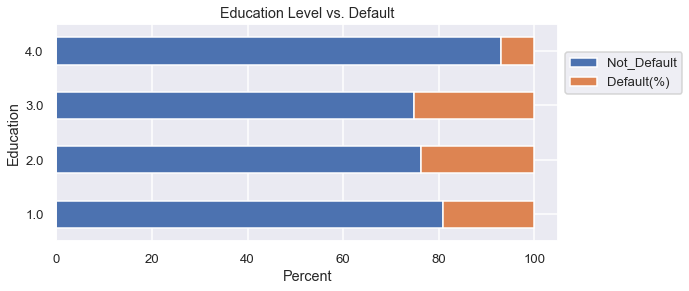

In [110]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = education_table.plot(x='Education', kind='barh', stacked=True, title='Education Level vs. Default')
ax.set_xlabel('Percent')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

# Outliers

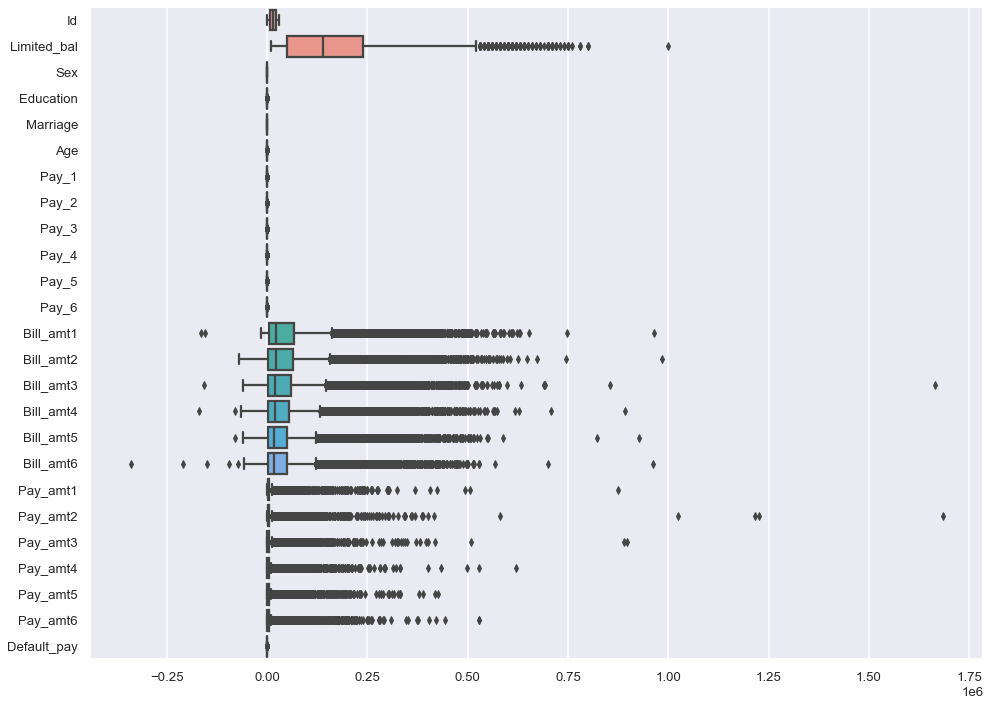

In [111]:
plt.figure(figsize= (16,12))
sns.boxplot(data= credit_c, orient='h')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


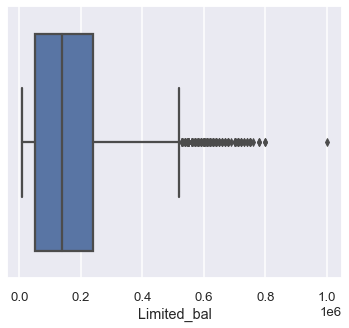

In [112]:
# Lets view the outliers for each feature seperately

plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Limited_bal'])
plt.show()

In [113]:
# To exclude the warnings

import warnings
warnings.filterwarnings('ignore')

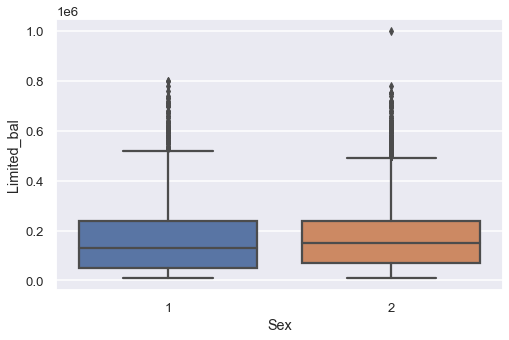

In [114]:
plt.figure(figsize= (8,5))
sns.boxplot(x = 'Sex', y = 'Limited_bal', data= credit_c)
plt.show()

### Viewing all Bill_amt columns

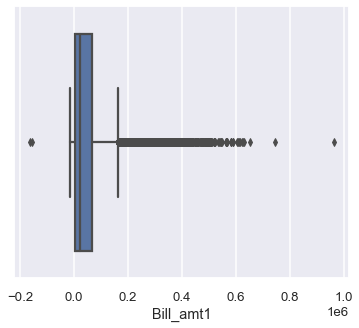

In [115]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Bill_amt1'])
plt.show()

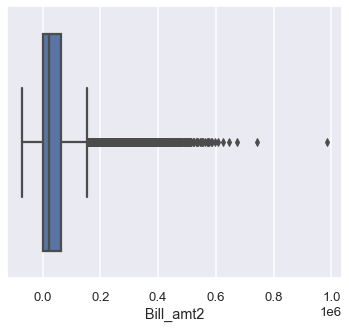

In [116]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Bill_amt2'])
plt.show()

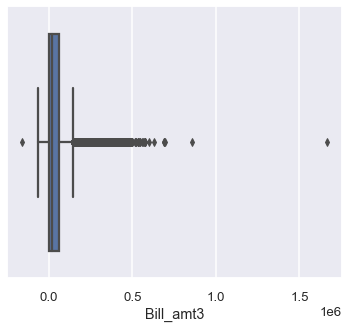

In [117]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Bill_amt3'])
plt.show()

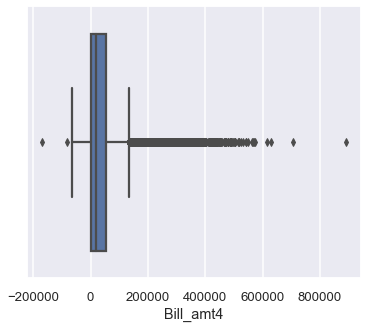

In [118]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Bill_amt4'])
plt.show()

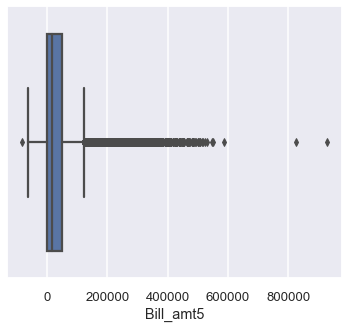

In [119]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Bill_amt5'])
plt.show()

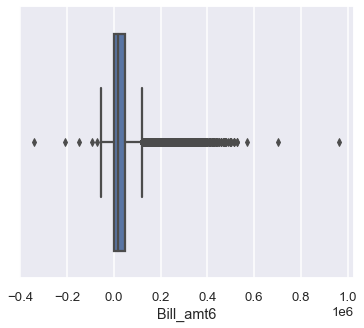

In [120]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Bill_amt6'])
plt.show()

### Viewing outliers for all Pay_amt columns

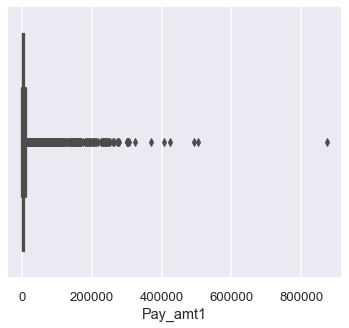

In [121]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Pay_amt1'])
plt.show()

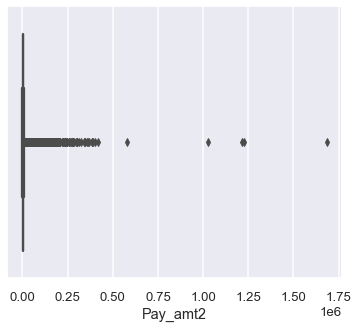

In [122]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Pay_amt2'])
plt.show()

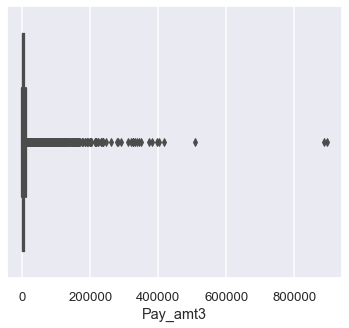

In [123]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Pay_amt3'])
plt.show()

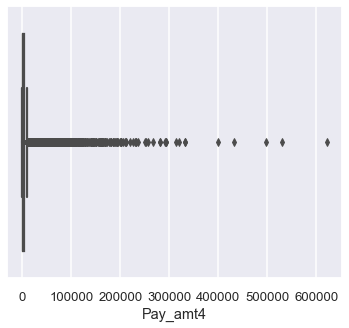

In [124]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Pay_amt4'])
plt.show()

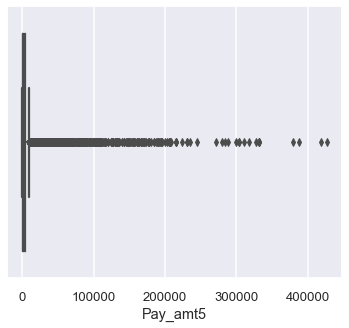

In [125]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Pay_amt5'])
plt.show()

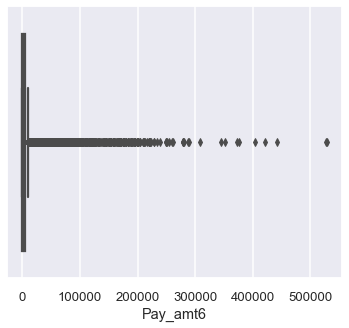

In [126]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Pay_amt6'])
plt.show()

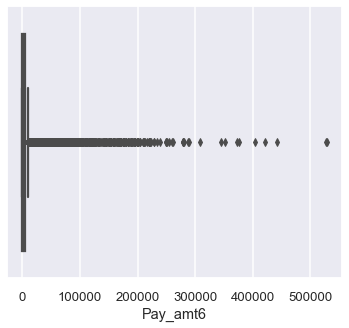

In [127]:
plt.figure(figsize= (6,5))
sns.boxplot(credit_c['Pay_amt6'])
plt.show()

# Here we tried to remove the outliers using 3 techniques IQR (Inter quartile range), Z-score method, Quantile(0.90), Quantile(0.10).

## All the 3 methods did not work removing outliers. 

### Hence, lets replace the outliers

# Outliers Treatment

In [128]:
print(credit_c.Limited_bal.skew())
print(credit_c.Limited_bal.describe())   # Since the skewness is 0.99 this column is positively skewed

0.992866960519544
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Limited_bal, dtype: float64


In [129]:
# Lets replace the outliers in Limited_bal column

print(credit_c['Limited_bal'].quantile(0.10))
print(credit_c['Limited_bal'].quantile(0.90))

30000.0
360000.0


In [130]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Limited_bal = np.where(credit_c.Limited_bal <30000.0, 30000.0, credit_c.Limited_bal )
credit_c.Limited_bal = np.where(credit_c.Limited_bal > 360000.0, 360000.0, credit_c.Limited_bal )

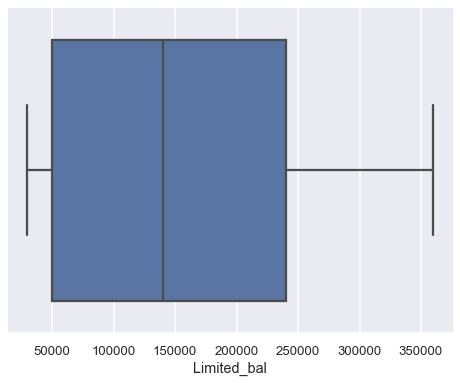

In [131]:
# Now lets view the outliers in limited Bal column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Limited_bal'])
plt.show()

### Lets try the same for Bill_amt column as well

In [132]:
print(credit_c.Bill_amt1.skew())
print(credit_c.Bill_amt1.describe())   # Since the skewness is 2.66 this column is highly positively skewed

2.6638610220232612
count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: Bill_amt1, dtype: float64


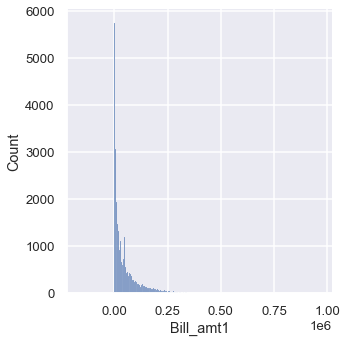

In [133]:
sns.displot(credit_c['Bill_amt1']);

In [134]:
# Lets replace the outliers in Bill amt column

print(credit_c['Bill_amt1'].quantile(0.10))
print(credit_c['Bill_amt1'].quantile(0.90))    # for month of Sepetember

278.9000000000001
142133.70000000004


In [135]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Bill_amt1 = np.where(credit_c.Bill_amt1 <278.90, 278.90, credit_c.Bill_amt1 )
credit_c.Bill_amt1 = np.where(credit_c.Bill_amt1 > 142133.70, 142133.70, credit_c.Bill_amt1 )

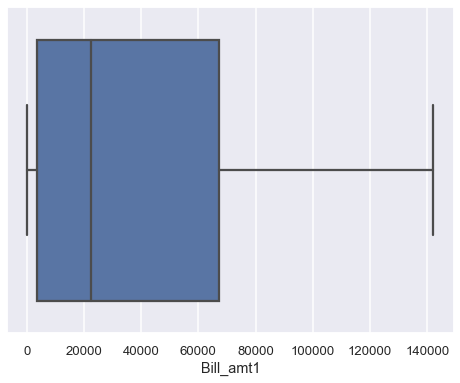

In [136]:
# Now lets view the outliers in Bill amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Bill_amt1'])
plt.show()

### August Month Bill_amt

In [137]:
print(credit_c.Bill_amt2.skew())
print(credit_c.Bill_amt2.describe())   # Since the skewness is 2.70 this column is highly positively skewed

2.7052208534082856
count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: Bill_amt2, dtype: float64


In [138]:
# Lets replace the outliers in Bill amt column

print(credit_c['Bill_amt2'].quantile(0.10))
print(credit_c['Bill_amt2'].quantile(0.90))    # for month of August

0.0
136905.5000000001


In [139]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Bill_amt2 = np.where(credit_c.Bill_amt2 <0.0, 0.0, credit_c.Bill_amt2 )
credit_c.Bill_amt2 = np.where(credit_c.Bill_amt2 > 136905.50, 136905.50, credit_c.Bill_amt2 )

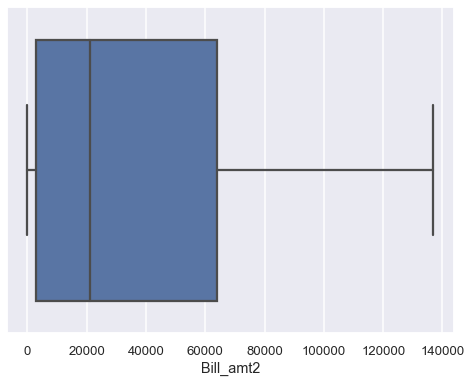

In [140]:
# Now lets view the outliers in Bill amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Bill_amt2'])
plt.show()

## July Month Bill_amt

In [141]:
print(credit_c.Bill_amt3.skew())
print(credit_c.Bill_amt3.describe())   # Since the skewness is 3.08 this column is highly positively skewed

3.0878300462007244
count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: Bill_amt3, dtype: float64


In [142]:
# Lets replace the outliers in Bill amt column

print(credit_c['Bill_amt3'].quantile(0.10))
print(credit_c['Bill_amt3'].quantile(0.90))    # for month of July

0.0
132051.30000000002


In [143]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Bill_amt3 = np.where(credit_c.Bill_amt3 <0.0, 0.0, credit_c.Bill_amt3)
credit_c.Bill_amt3 = np.where(credit_c.Bill_amt3 > 132051.30, 132051.30, credit_c.Bill_amt3)

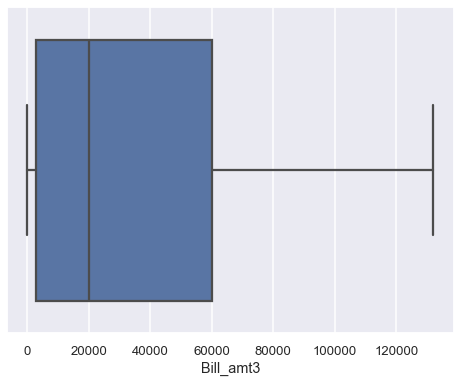

In [144]:
# Now lets view the outliers in Bill amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Bill_amt3'])
plt.show()

## June Month Bill_amt

In [145]:
print(credit_c.Bill_amt4.skew())
print(credit_c.Bill_amt4.describe())   # Since the skewness is 2.82 this column is highly positively skewed

2.8219652908028117
count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: Bill_amt4, dtype: float64


In [146]:
# Lets replace the outliers in Bill amt column

print(credit_c['Bill_amt4'].quantile(0.10))
print(credit_c['Bill_amt4'].quantile(0.90))    # for month of June

0.0
122418.70000000006


In [147]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Bill_amt4 = np.where(credit_c.Bill_amt4 <0.0, 0.0, credit_c.Bill_amt4)
credit_c.Bill_amt4 = np.where(credit_c.Bill_amt4 > 122418.70, 122418.70, credit_c.Bill_amt4)

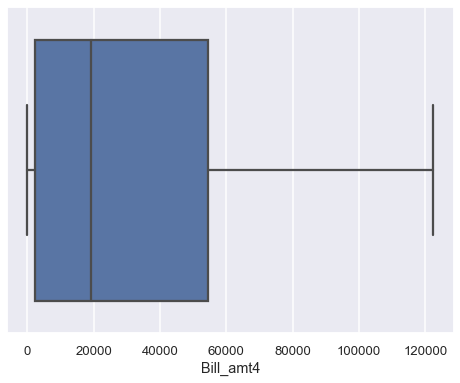

In [148]:
# Now lets view the outliers in Bill amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Bill_amt4'])
plt.show()

## May Month Bill_amt

In [149]:
print(credit_c.Bill_amt5.skew())
print(credit_c.Bill_amt5.describe())   # Since the skewness is 2.87 this column is highly positively skewed

2.8763798667028633
count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: Bill_amt5, dtype: float64


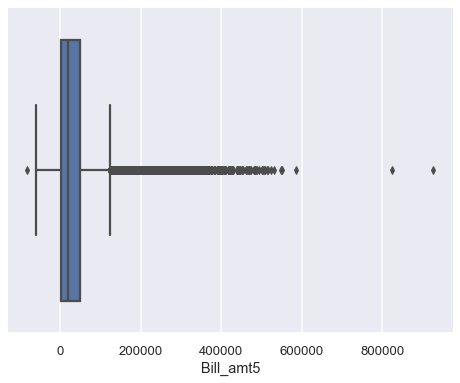

In [150]:
# Now lets view the outliers in Bill amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Bill_amt5'])
plt.show()

In [151]:
# Lets replace the outliers in Bill amt column

print(credit_c['Bill_amt5'].quantile(0.10))
print(credit_c['Bill_amt5'].quantile(0.90))    # for month of May

0.0
115883.00000000001


In [152]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Bill_amt5 = np.where(credit_c.Bill_amt5 <0.0, 0.0, credit_c.Bill_amt5)
credit_c.Bill_amt5 = np.where(credit_c.Bill_amt5 > 115883.00, 115883.00, credit_c.Bill_amt5)

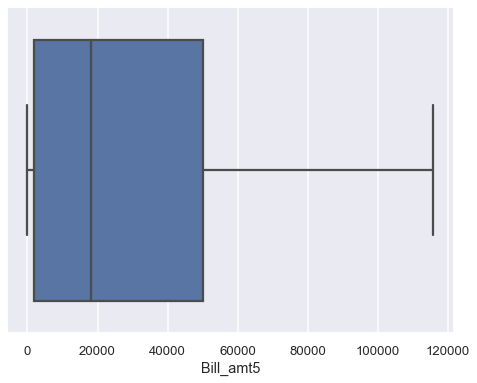

In [153]:
# Now lets view the outliers in Bill amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Bill_amt5'])
plt.show()

## April Month Bill_amt

In [154]:
print(credit_c.Bill_amt6.skew())
print(credit_c.Bill_amt6.describe())   # Since the skewness is 2.87 this column is highly positively skewed

2.8466445756603678
count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: Bill_amt6, dtype: float64


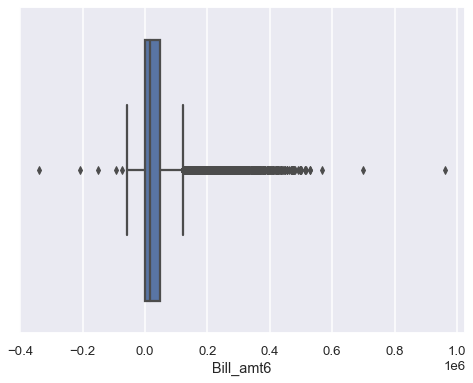

In [155]:
# Now lets view the outliers in Bill amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Bill_amt6'])
plt.show()

In [156]:
# Lets replace the outliers in Bill amt column

print(credit_c['Bill_amt6'].quantile(0.10))
print(credit_c['Bill_amt6'].quantile(0.90))    # for month of April

0.0
112110.40000000008


In [157]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Bill_amt6 = np.where(credit_c.Bill_amt6 <0.0, 0.0, credit_c.Bill_amt6)
credit_c.Bill_amt6 = np.where(credit_c.Bill_amt6 > 112110.40, 112110.40, credit_c.Bill_amt6)

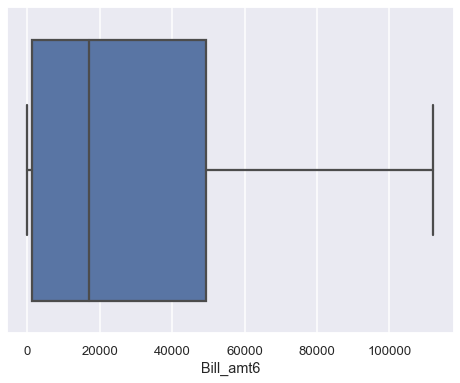

In [158]:
# Now lets view the outliers in Bill amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Bill_amt6'])
plt.show()

## Let fix the outliers for Pay_amt features as well

In [159]:
print(credit_c[['Pay_amt1','Pay_amt2','Pay_amt3','Pay_amt4','Pay_amt5','Pay_amt6']].skew())

# all the features are highly skewed

Pay_amt1    14.668364
Pay_amt2    30.453817
Pay_amt3    17.216635
Pay_amt4    12.904985
Pay_amt5    11.127417
Pay_amt6    10.640727
dtype: float64


### Sepetember Month Pay_amt

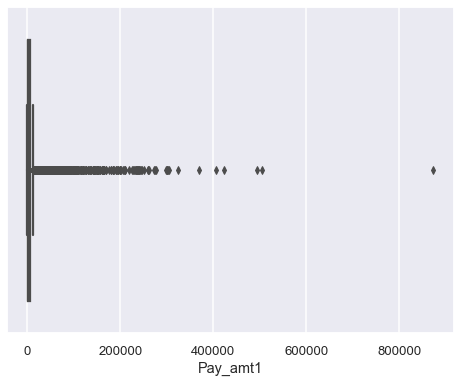

In [160]:
# Now lets view the outliers in Pay amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Pay_amt1'])
plt.show()

In [161]:
print(credit_c.Pay_amt1.skew())
print(credit_c.Pay_amt1.describe())   # Since the skewness is 14.66 this column is highly positively skewed

14.66836433284317
count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: Pay_amt1, dtype: float64


In [162]:
# Lets replace the outliers in Pay amt column

print(credit_c['Pay_amt1'].quantile(0.10))
print(credit_c['Pay_amt1'].quantile(0.90))    # for month of Sepetember

0.0
10300.0


In [163]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Pay_amt1 = np.where(credit_c.Pay_amt1 <0.0, 0.0, credit_c.Pay_amt1)
credit_c.Pay_amt1 = np.where(credit_c.Pay_amt1 > 10300.0, 10300.0, credit_c.Pay_amt1)

In [164]:
# Lets replace the outliers in Pay amt column

print(credit_c['Pay_amt2'].quantile(0.10))
print(credit_c['Pay_amt2'].quantile(0.90))    # for month of August

0.0
10401.100000000024


In [165]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Pay_amt2 = np.where(credit_c.Pay_amt2 <0.0, 0.0, credit_c.Pay_amt2)
credit_c.Pay_amt2 = np.where(credit_c.Pay_amt2 > 10401.10, 10401.10, credit_c.Pay_amt2)

In [166]:
# Lets replace the outliers in Pay amt column

print(credit_c['Pay_amt3'].quantile(0.10))
print(credit_c['Pay_amt3'].quantile(0.90))    # for month of July

0.0
10000.0


In [167]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Pay_amt3 = np.where(credit_c.Pay_amt3 <0.0, 0.0, credit_c.Pay_amt3)
credit_c.Pay_amt3 = np.where(credit_c.Pay_amt3 > 10000.0, 10000.0, credit_c.Pay_amt3)

In [168]:
# Lets replace the outliers in Pay amt column

print(credit_c['Pay_amt4'].quantile(0.10))
print(credit_c['Pay_amt4'].quantile(0.90))    # for month of June

0.0
9570.600000000013


In [169]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Pay_amt4 = np.where(credit_c.Pay_amt4 <0.0, 0.0, credit_c.Pay_amt4)
credit_c.Pay_amt4 = np.where(credit_c.Pay_amt4 > 9570.60, 9570.60, credit_c.Pay_amt4)

In [170]:
# Lets replace the outliers in Pay amt column

print(credit_c['Pay_amt5'].quantile(0.10))
print(credit_c['Pay_amt5'].quantile(0.90))    # for month of May

0.0
9500.0


In [171]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Pay_amt5 = np.where(credit_c.Pay_amt5 <0.0, 0.0, credit_c.Pay_amt5)
credit_c.Pay_amt5 = np.where(credit_c.Pay_amt5 > 9500.0, 9500.0, credit_c.Pay_amt5)

In [172]:
# Lets replace the outliers in Pay amt column

print(credit_c['Pay_amt6'].quantile(0.10))
print(credit_c['Pay_amt6'].quantile(0.90))    # for month of April

0.0
9600.0


In [173]:
# replacing the < 10% values with quantile(0.10) and > 90% values with quantile(0.90)

credit_c.Pay_amt6 = np.where(credit_c.Pay_amt6 <0.0, 0.0, credit_c.Pay_amt6)
credit_c.Pay_amt6 = np.where(credit_c.Pay_amt6 > 9500.0, 9500.0, credit_c.Pay_amt6)

## *As we have replaced the outliers in all Pay_amt columns lets view if there are any outliers*

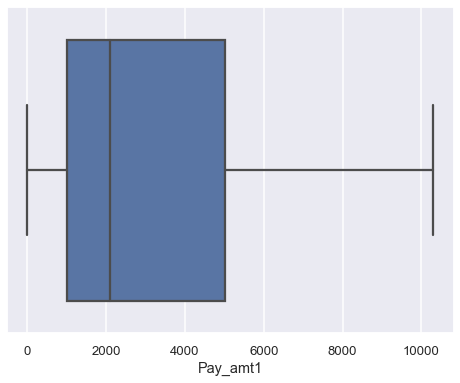

In [174]:
# Now lets view the outliers in Pay amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Pay_amt1'])
plt.show()

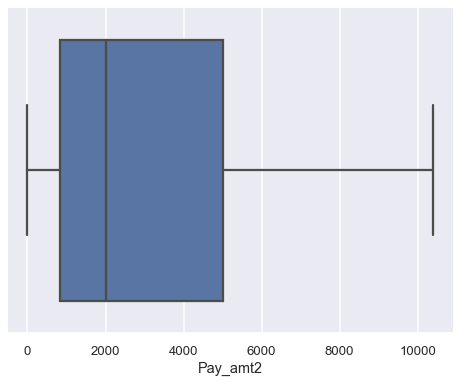

In [175]:
# Now lets view the outliers in Pay amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Pay_amt2'])
plt.show()

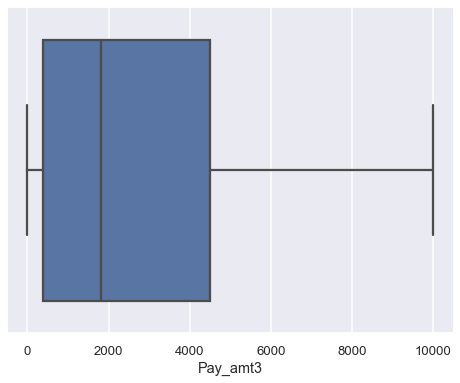

In [176]:
# Now lets view the outliers in Pay amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Pay_amt3'])
plt.show()

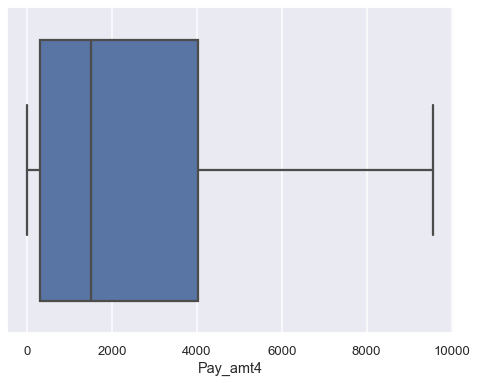

In [177]:
# Now lets view the outliers in Pay amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Pay_amt4'])
plt.show()

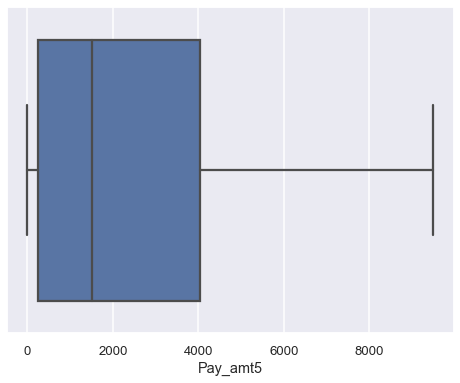

In [178]:
# Now lets view the outliers in Pay amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Pay_amt5'])
plt.show()

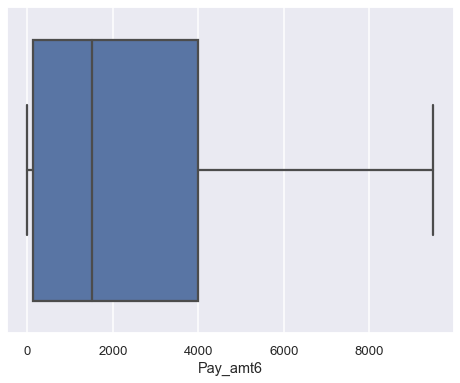

In [179]:
# Now lets view the outliers in Pay amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Pay_amt6'])
plt.show()

## *Lets view if there are any outliers in entire dataset*

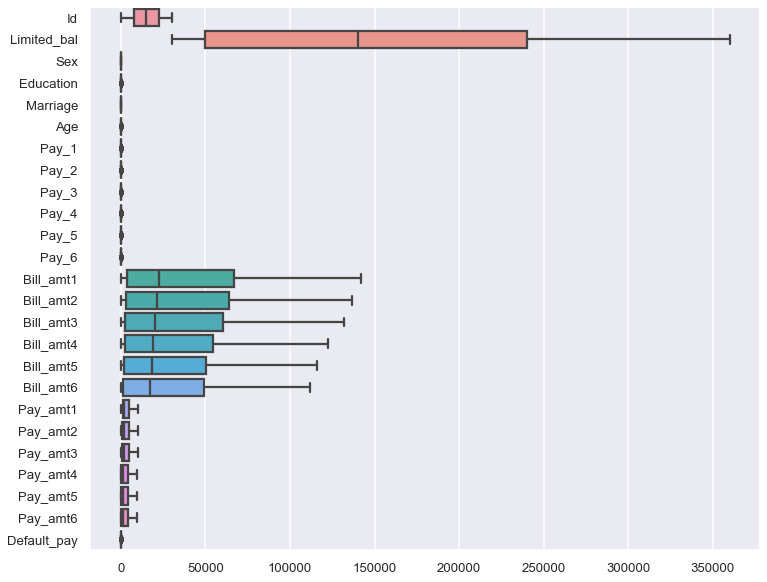

In [180]:
plt.figure(figsize = (12,10))
sns.boxplot(data= credit_c, orient= 'h')
plt.show()

## Now we see the outliers are fixed. The outliers in Pay_1 is ignorable

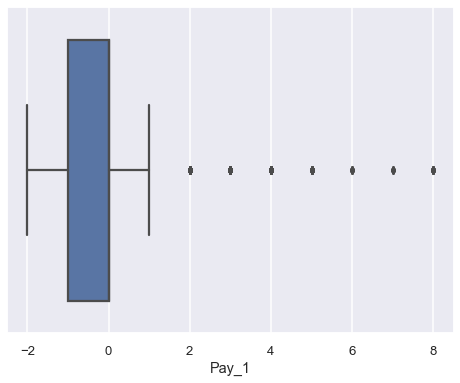

In [181]:
# Now lets view the outliers in Pay amt column

plt.figure(figsize= (8,6))
sns.boxplot(credit_c['Pay_1'])
plt.show()

In [182]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay', 'Age_binned'],
      dtype='object')

## Lets check which Month has highest Pay scale

<AxesSubplot:xlabel='Pay_1', ylabel='count'>

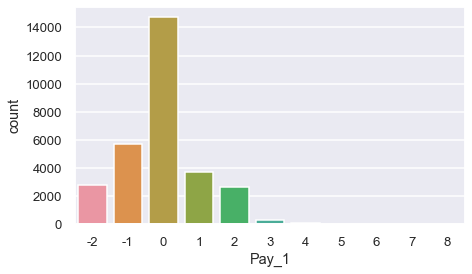

In [183]:
# Lets check which Month has highest Pay scale

plt.figure(figsize = (7,4))
sns.countplot(x = 'Pay_1',data = credit_c)  # Sepetember month delay

<AxesSubplot:xlabel='Pay_2', ylabel='count'>

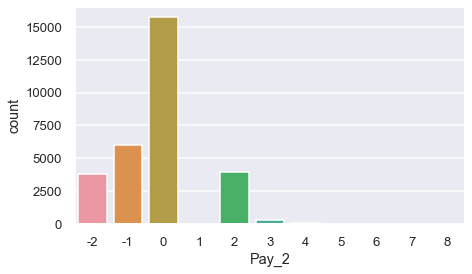

In [184]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'Pay_2',data = credit_c)  # August Month payment delay

<AxesSubplot:xlabel='Pay_3', ylabel='count'>

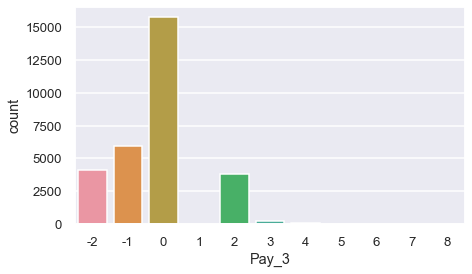

In [185]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'Pay_3',data = credit_c)  # July month payment delay

<AxesSubplot:xlabel='Pay_4', ylabel='count'>

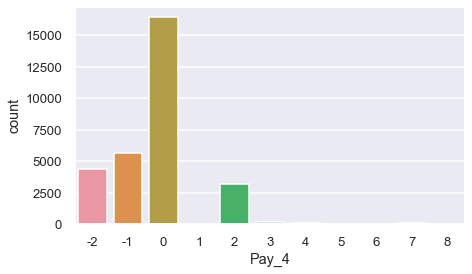

In [186]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'Pay_4',data = credit_c)  # June month payment dely

<AxesSubplot:xlabel='Pay_5', ylabel='count'>

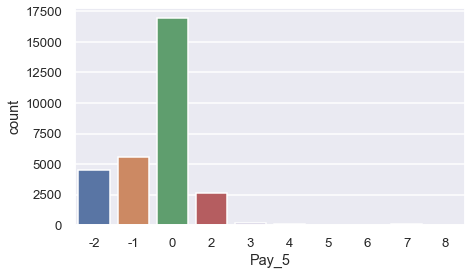

In [187]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'Pay_5',data = credit_c)  # May month payment delay

<AxesSubplot:xlabel='Pay_6', ylabel='count'>

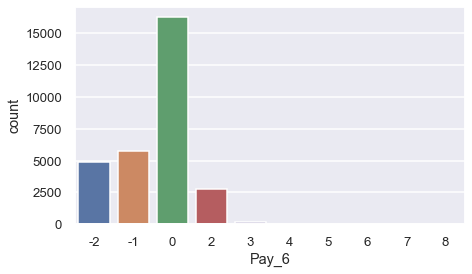

In [188]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'Pay_6',data = credit_c)   # April month payment delay

# Correlation 

In [189]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay', 'Age_binned'],
      dtype='object')

<AxesSubplot:>

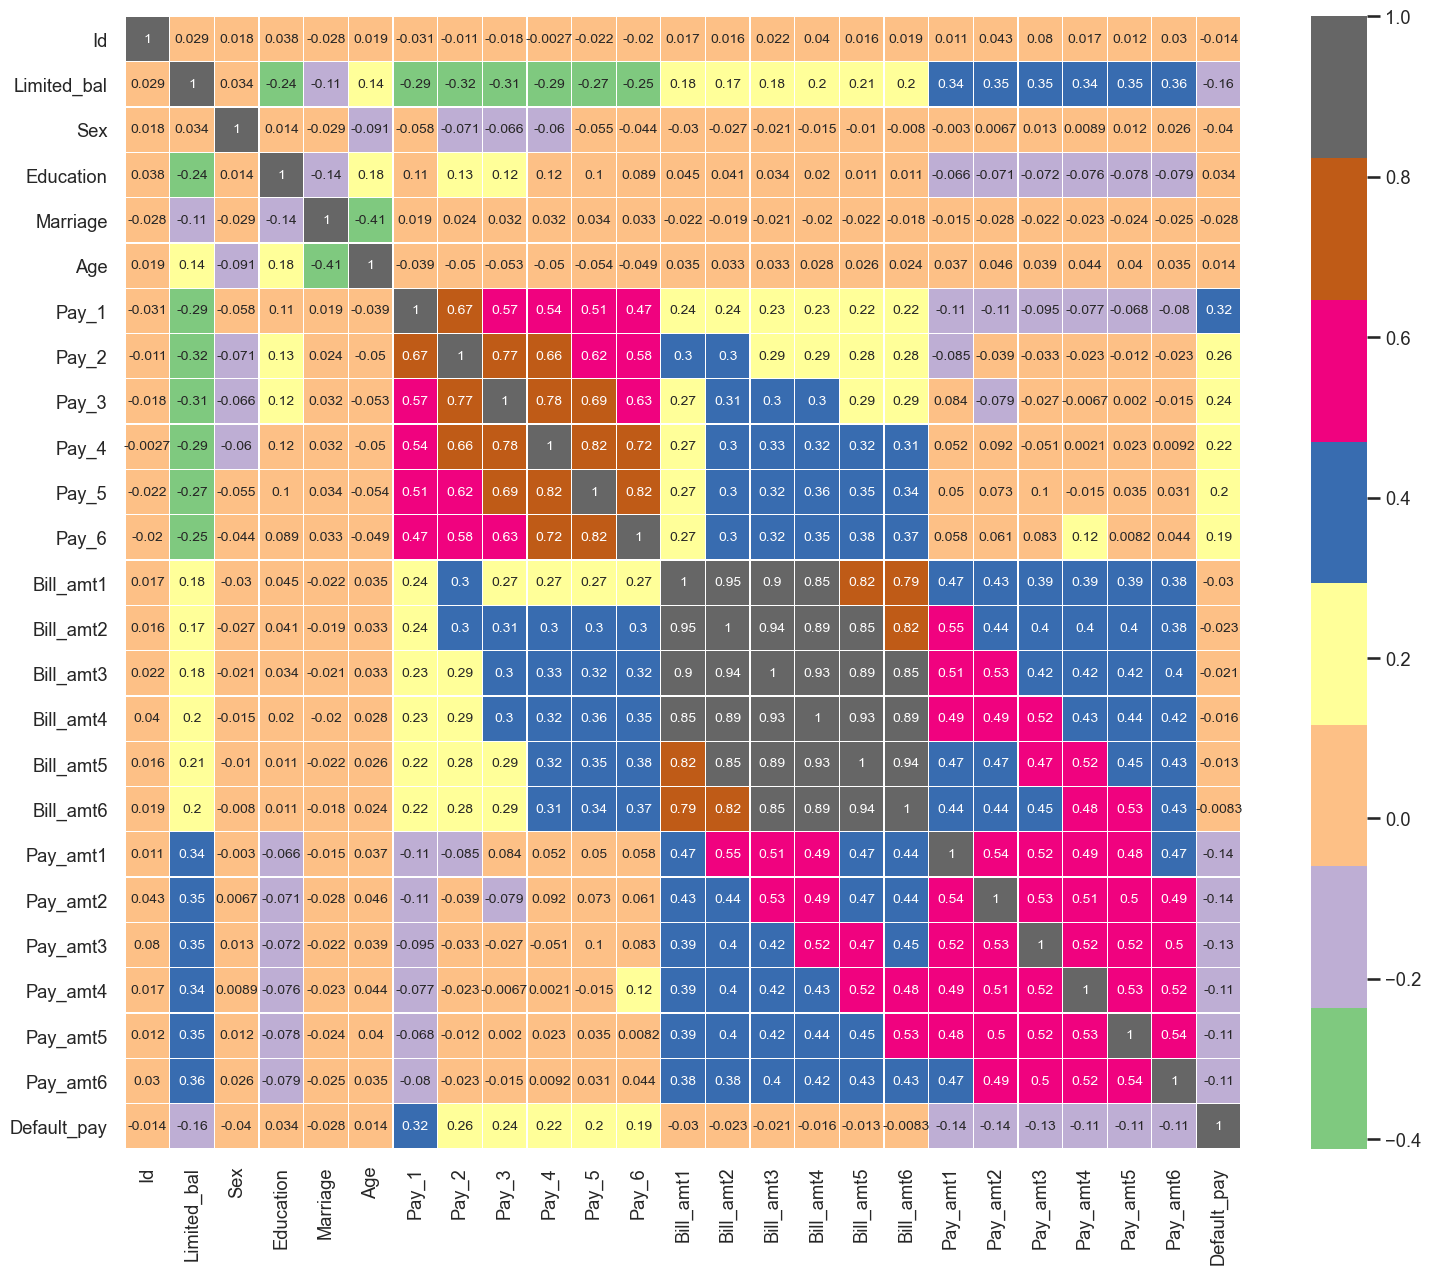

In [190]:
plt.figure(figsize= (18,15), dpi=100)
sns.heatmap(credit_c.corr(), annot= True, 
            annot_kws= {'size': 10}, linewidths= 0.2, cmap= 'Accent')

    Since the correlation with target variable 'Default pay' is less that 0.50, lets consider the threshold value as 0.20 (positive co-relation) and -0.020 for negative co-relation

In [191]:
# Normal co-relation map with the variables

corr = credit_c.corr()
corr

,Id,Limited_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay
Id,1.000000,0.029052,0.018497,0.037659,-0.028208,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040494,0.015938,0.018620,0.010693,0.043386,0.079602,0.016678,0.012412,0.029922,-0.013952
Limited_bal,0.029052,1.000000,0.033788,-0.238235,-0.113052,0.140105,-0.286285,-0.316022,-0.305056,-0.286911,...,0.199052,0.205136,0.198349,0.337571,0.345537,0.352129,0.344400,0.348601,0.364746,-0.158465
Sex,0.018497,0.033788,1.000000,0.013627,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.014947,-0.010449,-0.007987,-0.002999,0.006694,0.013002,0.008935,0.011917,0.025694,-0.039961
Education,0.037659,-0.238235,0.013627,1.000000,-0.136797,0.182434,0.112593,0.129703,0.122425,0.116531,...,0.019577,0.011034,0.010667,-0.065541,-0.071114,-0.072091,-0.075551,-0.078311,-0.078839,0.033842
Marriage,-0.028208,-0.113052,-0.028522,-0.136797,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,...,-0.020185,-0.021509,-0.018138,-0.014528,-0.028311,-0.021965,-0.023208,-0.023986,-0.024752,-0.027575
Age,0.018678,0.140105,-0.090874,0.182434,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.027893,0.025535,0.023636,0.036698,0.045929,0.038632,0.044298,0.039760,0.034595,0.013890
Pay_1,-0.030575,-0.286285,-0.057643,0.112593,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.227167,0.224189,0.221205,-0.114454,-0.106363,-0.094678,-0.076929,-0.067626,-0.080060,0.324794
Pay_2,-0.011215,-0.316022,-0.070771,0.129703,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.288077,0.282984,0.280243,-0.084736,-0.039321,-0.032655,-0.022651,-0.011518,-0.022628,0.263551
Pay_3,-0.018494,-0.305056,-0.066096,0.122425,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.297387,0.290696,0.286417,0.084298,-0.078818,-0.027006,-0.006690,0.002042,-0.015155,0.235253
Pay_4,-0.002735,-0.286911,-0.060173,0.116531,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.324082,0.316674,0.311372,0.052225,0.092092,-0.051183,0.002146,0.022565,0.009167,0.216614


In [192]:
#Correlation with output variable

cor_target = corr["Default_pay"]
#Selecting highly correlated features

relevant_features = cor_target[(cor_target > 0.20) | (cor_target < -0.10)]
relevant_features

Limited_bal   -0.158465
Pay_1          0.324794
Pay_2          0.263551
Pay_3          0.235253
Pay_4          0.216614
Pay_5          0.204149
Pay_amt1      -0.144909
Pay_amt2      -0.140366
Pay_amt3      -0.125545
Pay_amt4      -0.113745
Pay_amt5      -0.108179
Pay_amt6      -0.114831
Default_pay    1.000000
Name: Default_pay, dtype: float64

# Which features are important

In [193]:
credit_c.columns

Index(['Id', 'Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default_pay', 'Age_binned'],
      dtype='object')

In [194]:
# Lets split the data to x and y and check which are the features which highly required.

x1 = credit_c[['Limited_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6']]

y1 = credit_c['Default_pay']

### Lets try the Feature Importance ExtratreeClassifier technique

In [195]:
from sklearn.ensemble import ExtraTreesClassifier

In [196]:
model = ExtraTreesClassifier()

In [197]:
model.fit(x1,y1)

ExtraTreesClassifier()

In [198]:
print(model.feature_importances_) # use inbuild class feature_importaces_ of tree based classifiers

[0.06357331 0.01906152 0.03608399 0.02611026 0.0723558  0.09537657
 0.04152081 0.03518809 0.02934969 0.02830098 0.02945405 0.04658493
 0.0416089  0.04050468 0.03947826 0.03865567 0.04036537 0.05133217
 0.04708495 0.04446627 0.04300675 0.04355866 0.04697831]


### plot graph of feature importances for better visualization

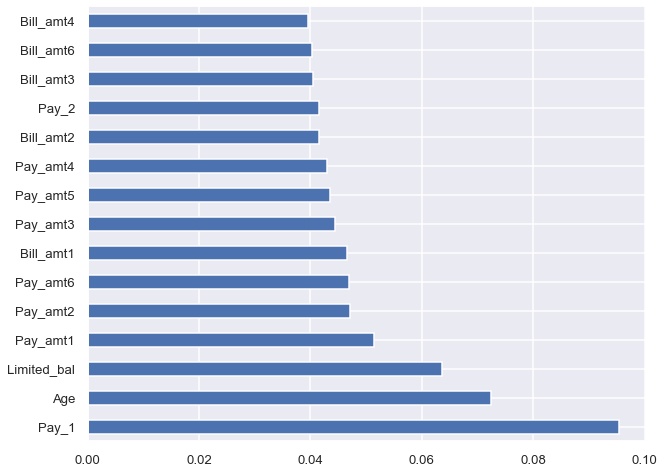

In [200]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(model.feature_importances_, index= x1.columns)
feat_importances.nlargest(15).plot(kind = 'barh')
plt.show()

<AxesSubplot:>

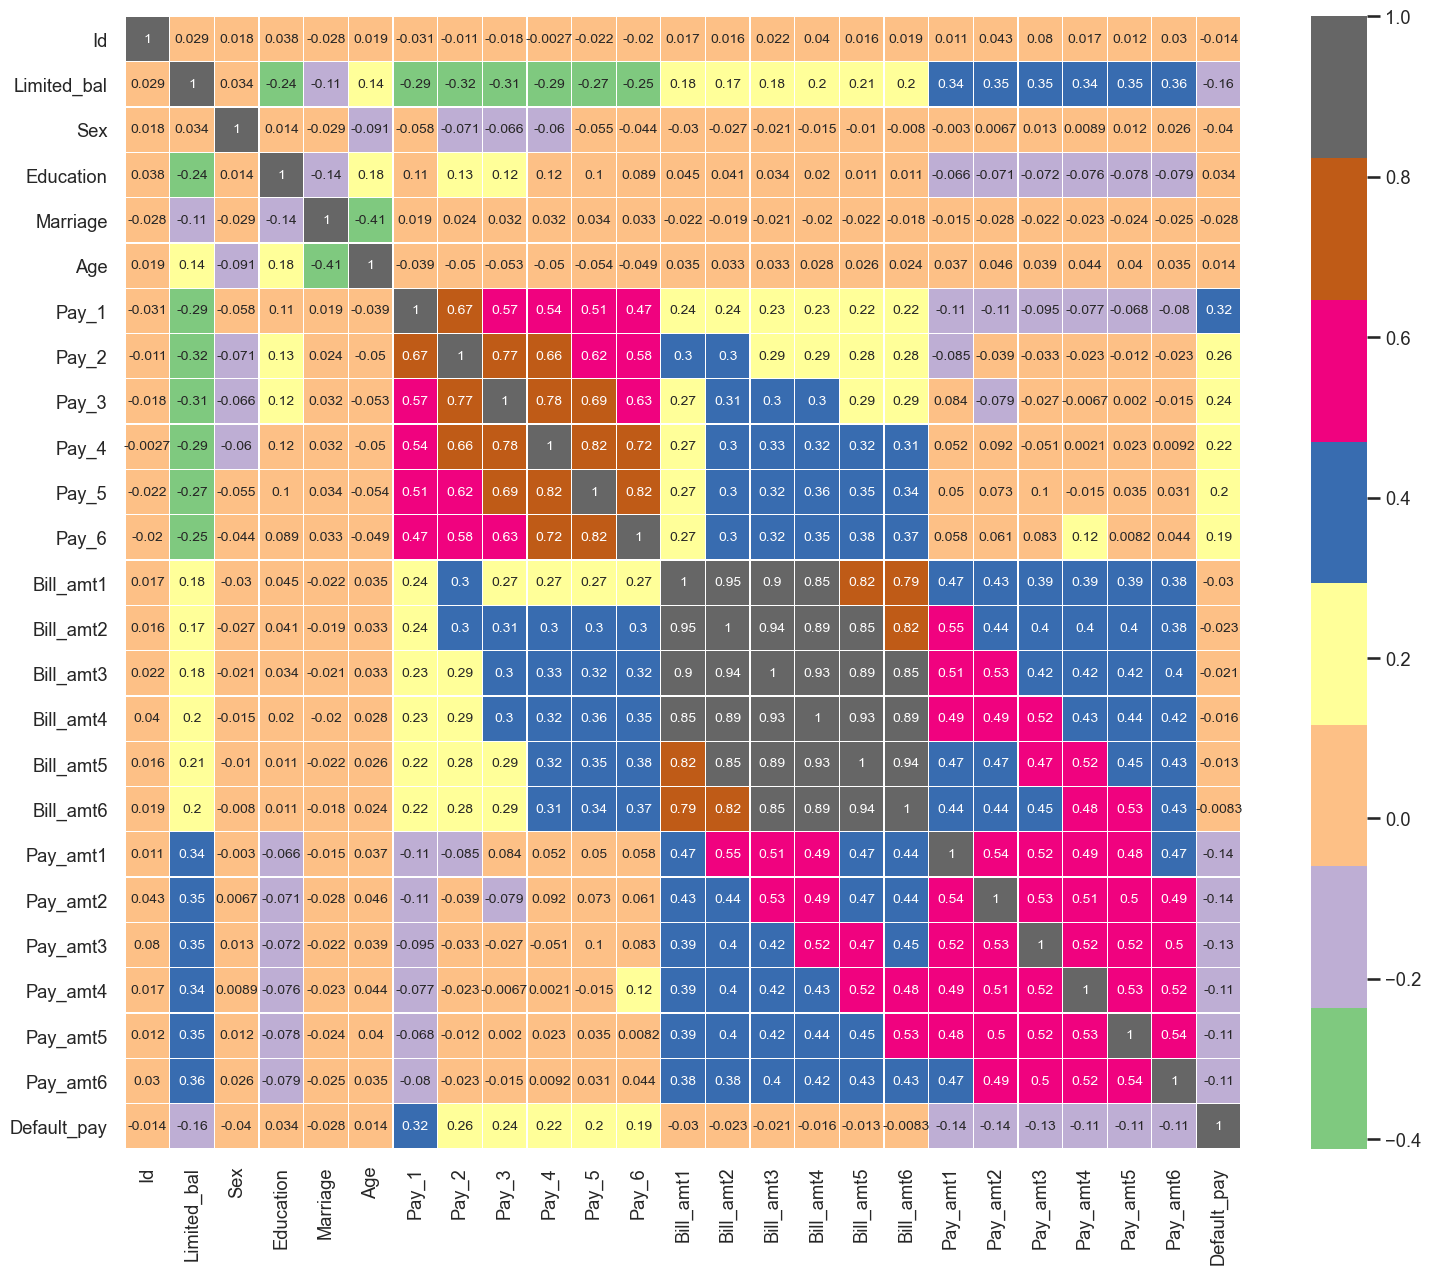

In [201]:
plt.figure(figsize= (18,15), dpi=100)
sns.heatmap(credit_c.corr(), annot= True, 
            annot_kws= {'size': 10}, linewidths= 0.2, cmap= 'Accent')

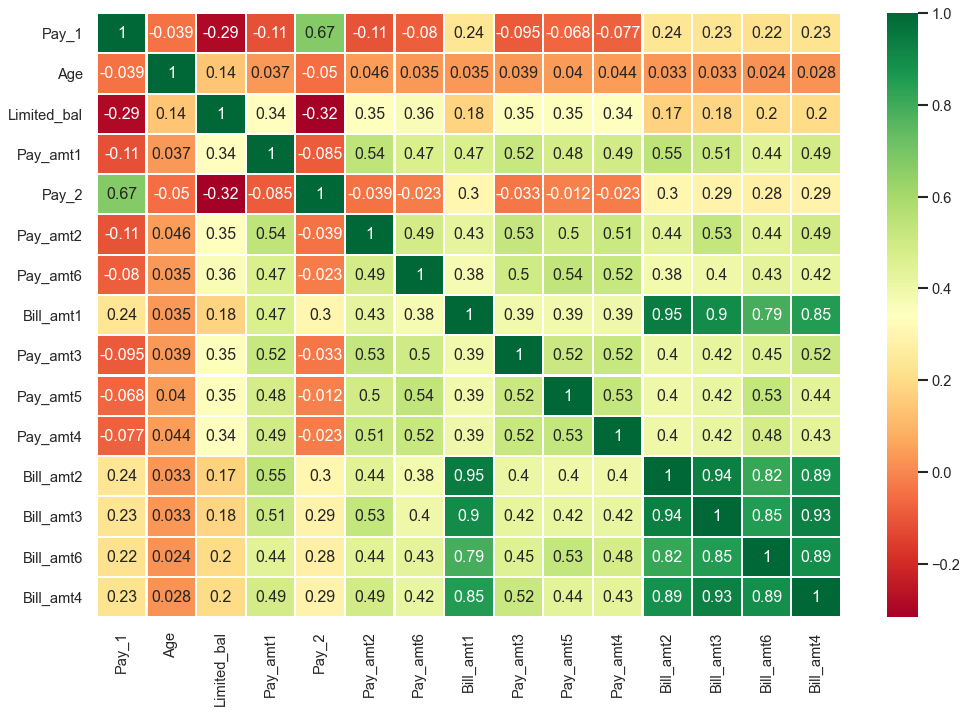

In [202]:
# Now checking multi-colinearity between the above (independent) features

plt.figure(figsize= (15,10), dpi=80)
sns.heatmap(credit_c[['Pay_1','Age','Limited_bal','Pay_amt1','Pay_2','Pay_amt2',
                     'Pay_amt6','Bill_amt1','Pay_amt3','Pay_amt5','Pay_amt4','Bill_amt2',
                     'Bill_amt3','Bill_amt6','Bill_amt4']].corr(), annot=True, cmap='RdYlGn', 
        linewidths=1, linecolor='white')
plt.show()

In [ ]:
# Here these are the variables which are less multicolinear to each other

# 'Pay_1','Age','Limited_bal','Pay_amt1','Pay_amt2','Bill_amt1','Bill_amt2','Bill_amt3','Pay_amt3'

## Now dividing the data to X and Y

In [203]:
X = credit_c[['Pay_1','Age','Limited_bal','Pay_amt1','Pay_amt2','Bill_amt1','Bill_amt2','Bill_amt3','Pay_amt3']]

y = credit_c['Default_pay']

In [204]:
X

,Pay_1,Age,Limited_bal,Pay_amt1,Pay_amt2,Bill_amt1,Bill_amt2,Bill_amt3,Pay_amt3
0,2,24,30000.0,0.0,689.0,3913.0,3102.0,689.0,0.0
1,-1,26,120000.0,0.0,1000.0,2682.0,1725.0,2682.0,1000.0
2,0,34,90000.0,1518.0,1500.0,29239.0,14027.0,13559.0,1000.0
3,0,37,50000.0,2000.0,2019.0,46990.0,48233.0,49291.0,1200.0
4,-1,57,50000.0,2000.0,10401.1,8617.0,5670.0,35835.0,10000.0
...,...,...,...,...,...,...,...,...,...
29995,0,39,220000.0,8500.0,10401.1,142133.7,136905.5,132051.3,5003.0
29996,-1,43,150000.0,1837.0,3526.0,1683.0,1828.0,3502.0,8998.0
29997,4,37,30000.0,0.0,0.0,3565.0,3356.0,2758.0,10000.0
29998,1,41,80000.0,10300.0,3409.0,278.9,78379.0,76304.0,1178.0


## Splitting the data

In [206]:
# Splitting the data

from sklearn.model_selection import train_test_split

In [207]:
X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=143)

In [208]:
X_train.shape

(21000, 9)

In [209]:
x_test.shape

(9000, 9)

In [210]:
Y_train.shape

(21000,)

In [211]:
y_test.shape

(9000,)

## Model Building

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
logreg = LogisticRegression()

In [214]:
logreg.fit(X_train,Y_train)

LogisticRegression()

## Predicting the train set results and calculating the accuracy

In [215]:
y_train_pred = logreg.predict(X_train)

print('Accuracy of Logistic Regression Classifier on train set: {:.2f}'.format(logreg.score(X_train, Y_train)))

Accuracy of Logistic Regression Classifier on train set: 0.78


## Confusion Matrix

In [216]:
from sklearn.metrics import confusion_matrix

In [217]:
confusion_matrix = confusion_matrix(Y_train,y_train_pred)

print(confusion_matrix)

[[16393     9]
 [ 4587    11]]


    The result is telling us that we have 16393+11 correct predictions and 4587+9 incorrect predictions.

## Computing precision, recall, F-measure and support

In [218]:
from sklearn.metrics import classification_report

In [219]:
print(classification_report(Y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     16402
           1       0.55      0.00      0.00      4598

    accuracy                           0.78     21000
   macro avg       0.67      0.50      0.44     21000
weighted avg       0.73      0.78      0.69     21000



# Predicting the test set results and calculating the accuracy

In [220]:
y_test_pred = logreg.predict(x_test)

print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.77


In [221]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6962
           1       0.62      0.00      0.00      2038

    accuracy                           0.77      9000
   macro avg       0.70      0.50      0.44      9000
weighted avg       0.74      0.77      0.68      9000



# Using RandomForest Classifier

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
clf=RandomForestClassifier(n_estimators=1000)

In [224]:
clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

## Predicting the result for training data

In [225]:
y_train_pred=clf.predict(X_train)

In [226]:
from sklearn import metrics

In [227]:
print("Accuracy of Random Forest Classifier for train test : {:.2f}".format(metrics.accuracy_score(Y_train, y_train_pred)))

Accuracy of Random Forest Classifier for train test : 0.99


## Predicting the result for test data

In [228]:
y_test_pred = clf.predict(x_test)

In [229]:
print("Accuracy of Random Forest Classifier for test test : {:.2f}".format(metrics.accuracy_score(y_test, y_test_pred)))

Accuracy of Random Forest Classifier for test test : 0.81


In [230]:
X = credit_c[['Pay_1','Age','Limited_bal','Pay_amt1','Pay_amt2','Bill_amt1','Bill_amt2','Bill_amt3','Pay_amt3']]

y = credit_c['Default_pay']

In [231]:
X

,Pay_1,Age,Limited_bal,Pay_amt1,Pay_amt2,Bill_amt1,Bill_amt2,Bill_amt3,Pay_amt3
0,2,24,30000.0,0.0,689.0,3913.0,3102.0,689.0,0.0
1,-1,26,120000.0,0.0,1000.0,2682.0,1725.0,2682.0,1000.0
2,0,34,90000.0,1518.0,1500.0,29239.0,14027.0,13559.0,1000.0
3,0,37,50000.0,2000.0,2019.0,46990.0,48233.0,49291.0,1200.0
4,-1,57,50000.0,2000.0,10401.1,8617.0,5670.0,35835.0,10000.0
...,...,...,...,...,...,...,...,...,...
29995,0,39,220000.0,8500.0,10401.1,142133.7,136905.5,132051.3,5003.0
29996,-1,43,150000.0,1837.0,3526.0,1683.0,1828.0,3502.0,8998.0
29997,4,37,30000.0,0.0,0.0,3565.0,3356.0,2758.0,10000.0
29998,1,41,80000.0,10300.0,3409.0,278.9,78379.0,76304.0,1178.0
